In [10]:
%matplotlib inline
import sys
import os
import time
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import ticker
from mpl_toolkits.basemap import Basemap, addcyclic, shiftgrid

In [4]:
import community_detection

We consider the SST field in the CM4 Climate model. 

Temporal resolution: 1 week

Grid resolution: $0.5^\circ$ (regular grid)

# Community detection

In [6]:
# No reason for heuristics here

path = '/Users/fabrizio/Dropbox/Science_and_Co/POSTDOC/Analysis/Analysis/CM4/Dimensionality_Reduction_Modelling/model/dimensionality_reduction/Data/SST/Pacific/highpass/tos_300yrs_Pacific_a_0p5deg_weekly_land0_filtered.nc'
climate_variable = 'tos'
lon_variable = 'lon'
lat_variable = 'lat'
rand_sample = 1000000
q = 0.95
q_distances = 1 # ---> no heuristic

import time

start = time.time()

community_map, single_communities, average_signals, cumulative_signals = community_detection.community_detection(path,climate_variable,lon_variable,lat_variable,
                                                                                                                 rand_sample,q,q_distances)
end = time.time()

print('Finished in '+str(round(end - start, 2))+' seconds')

Loading dataset
Time series with all zeros are set to nan
Standardizing each time series
Computing the k parameter
k = 0.7614834852361421
No Heuristic for spatial contiguous cluster
Infer graph
Community detection via Infomap
Found 29 communities
Embed communities in the map
Compute signals
Load dataset again
Compute average and cumulative anomalies
Finished in 532.96 seconds


In [12]:
# We remove small communities which can be considered as noise
# and save 
# - communities
# - average signals (we can do the same with cumulative signals too)
# a new community map
N = 50 # we consider a community with less than 10 nodes as noise
x = single_communities
x_t = average_signals
new_single_communities, new_average_signals, new_community_map = community_detection.larger_communities(x, N, x_t)

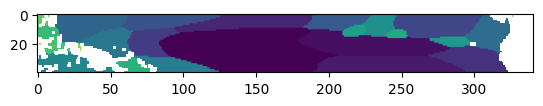

In [11]:
plt.imshow(np.flipud(community_map))

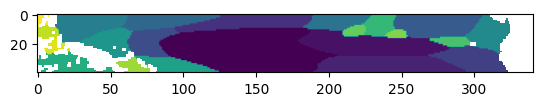

In [13]:
plt.imshow(np.flipud(new_community_map))

In [14]:
single_communities.shape

(29, 40, 341)

In [15]:
new_single_communities.shape

(22, 40, 341)

In [16]:
np.save('./results/community_map_infomap.npy',new_community_map)
np.save('./results/single_communities_infomap.npy',new_single_communities)
np.save('./results/average_signals_infomap.npy',new_average_signals)
#np.save('../results/sst/tropical_pacific/original/q_0p95/cumulative_signals_louvain.npy',cumulative_signals)

# Analyze piControl Communities

In [17]:
# Load longitudes and latitudes
path = '/Users/fabrizio/Dropbox/Science_and_Co/POSTDOC/Analysis/Analysis/CM4/Dimensionality_Reduction_Modelling/model/dimensionality_reduction/Data/SST/Pacific/highpass/tos_300yrs_Pacific_a_0p5deg_weekly_land0_filtered.nc'
climate_variable = 'tos'
lon_variable = 'lon'
lat_variable = 'lat'

import utils

data = utils.load_data(path,climate_variable)
data = utils.masked_array_to_numpy(data)

latitudes = utils.load_data(path,lat_variable)
latitudes = utils.masked_array_to_numpy(latitudes)

longitudes = utils.load_data(path,lon_variable)
longitudes = utils.masked_array_to_numpy(longitudes)

In [18]:
data.shape

(15695, 40, 341)

## Communities

In [19]:
community_map = np.load('./results/community_map_infomap.npy')
single_communities = np.load('./results/single_communities_infomap.npy')
average_signals = np.load('./results/average_signals_infomap.npy')

In [20]:
average_signals.shape

(22, 15695)

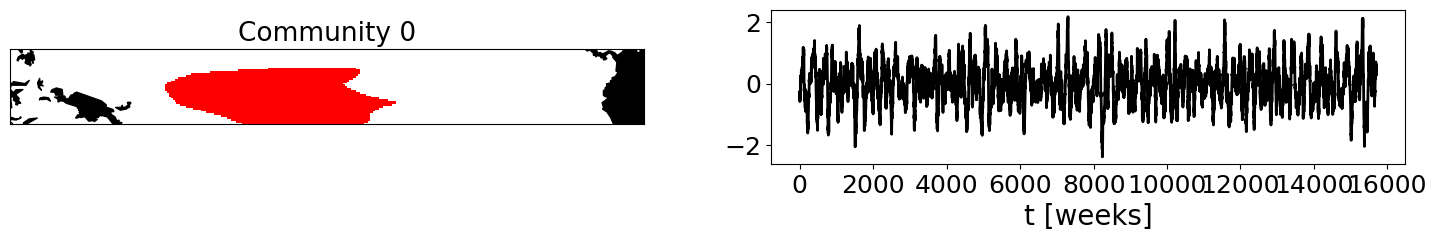

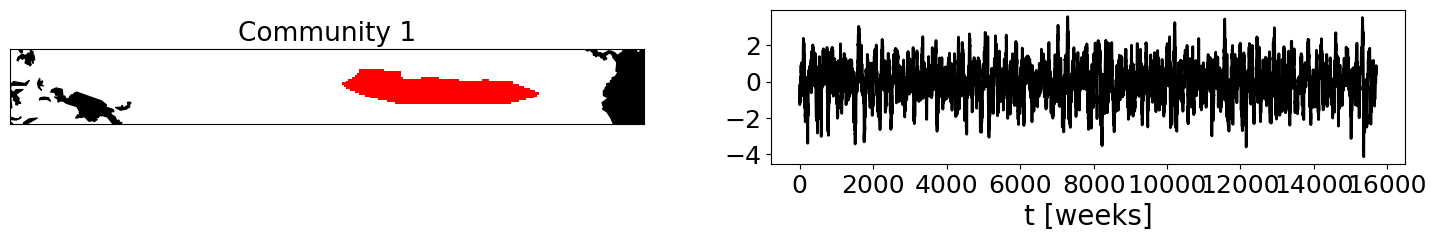

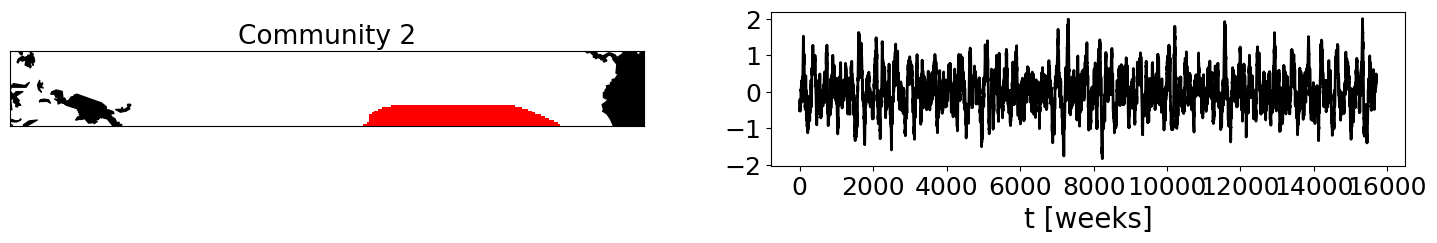

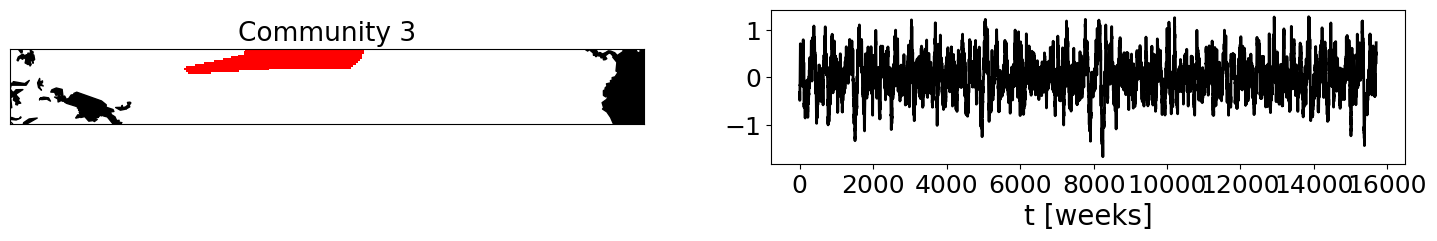

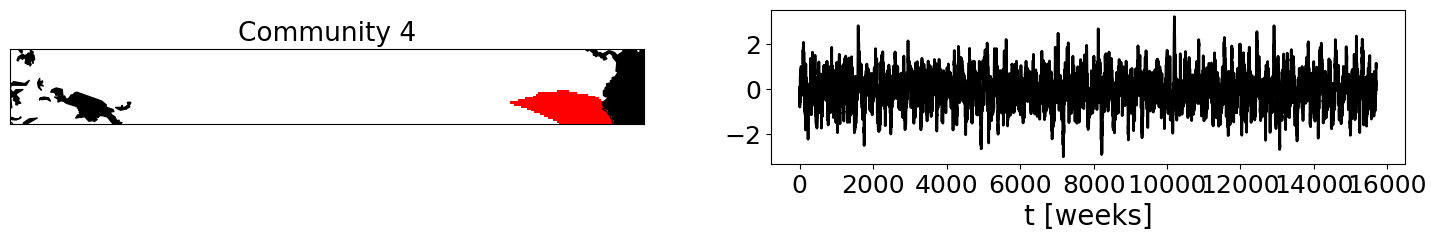

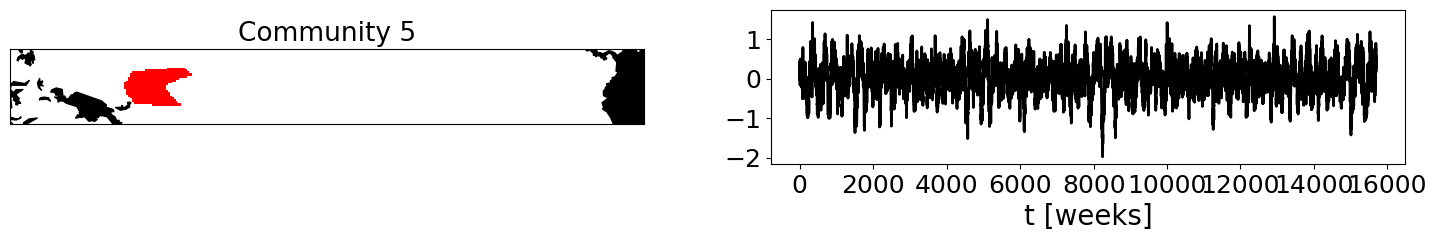

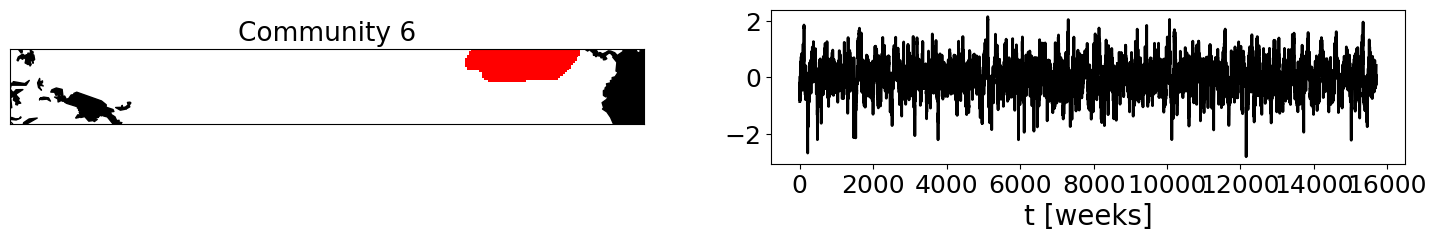

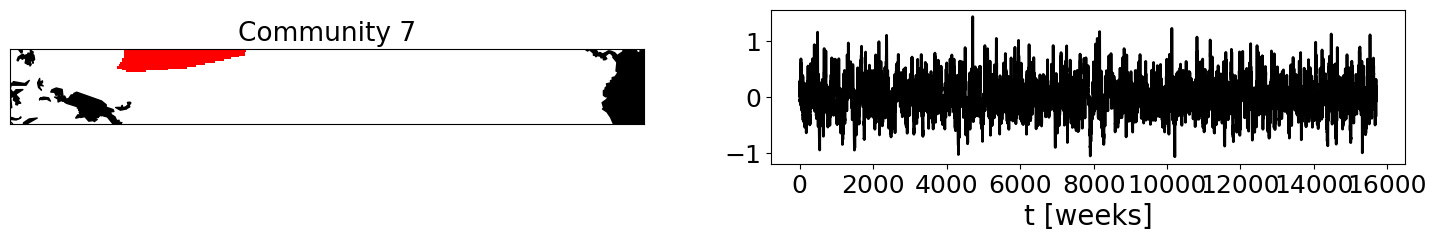

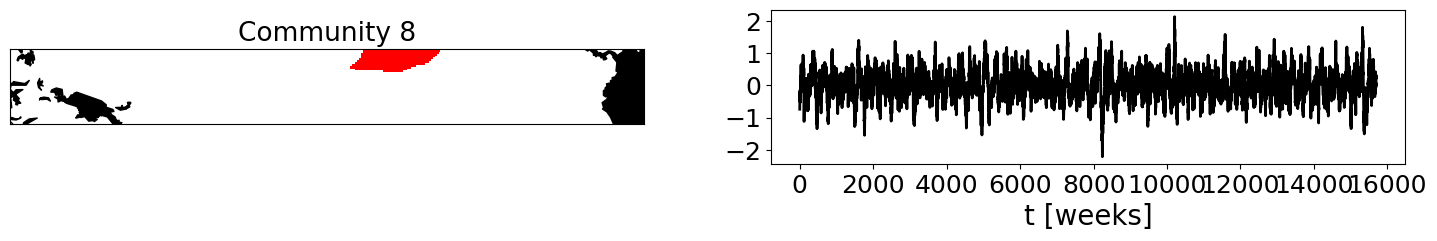

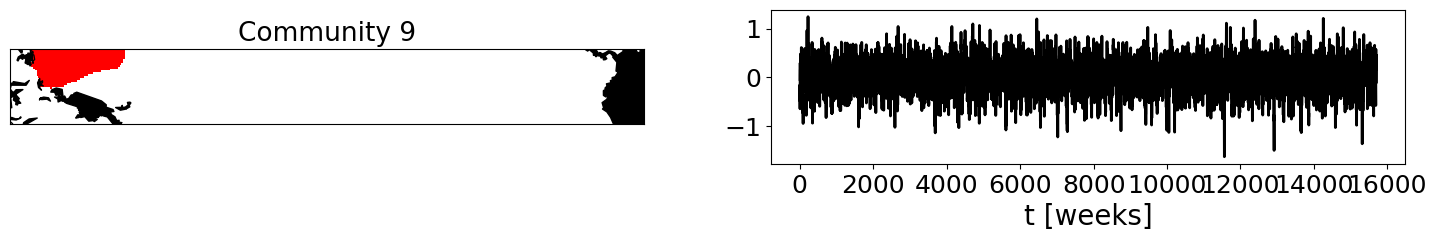

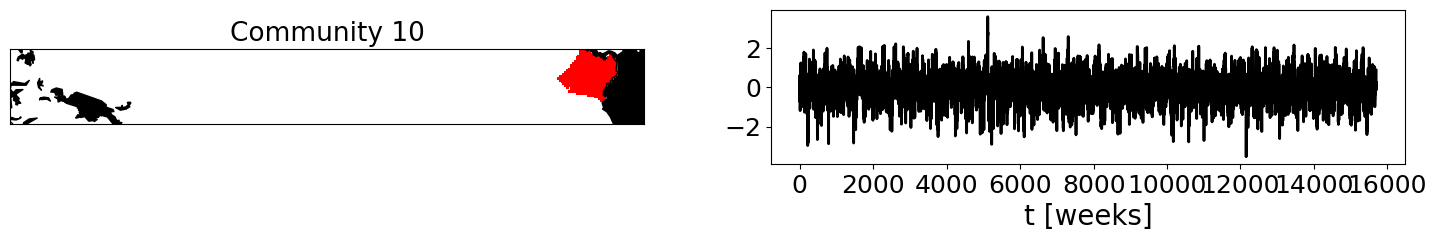

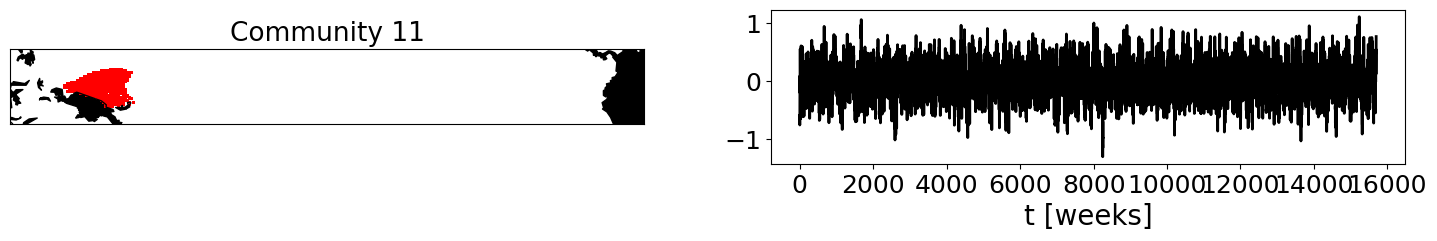

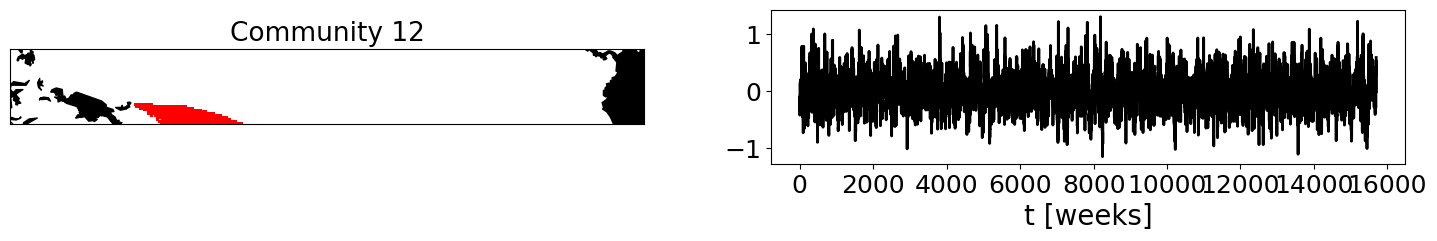

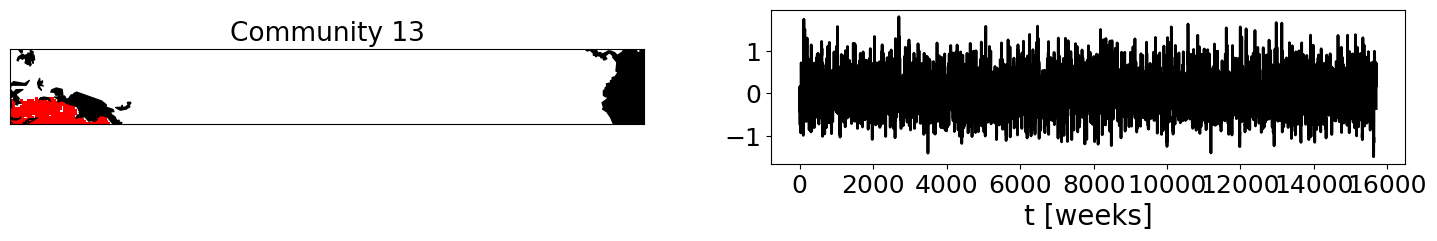

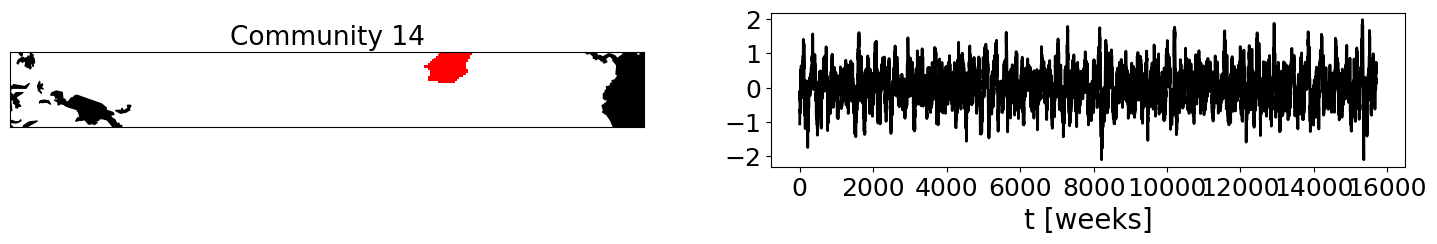

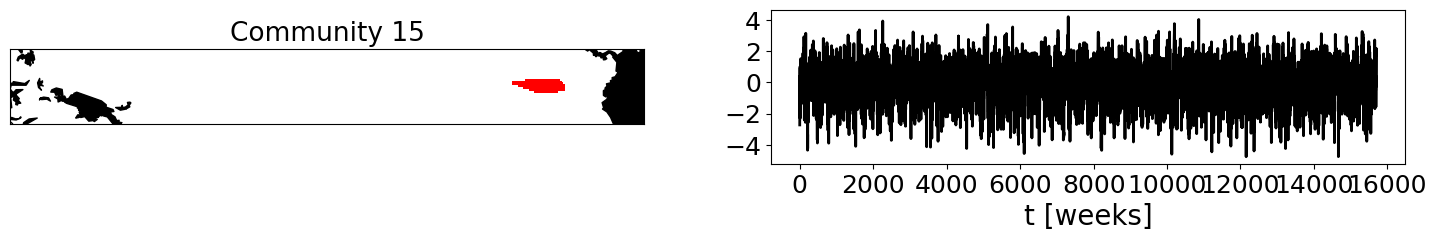

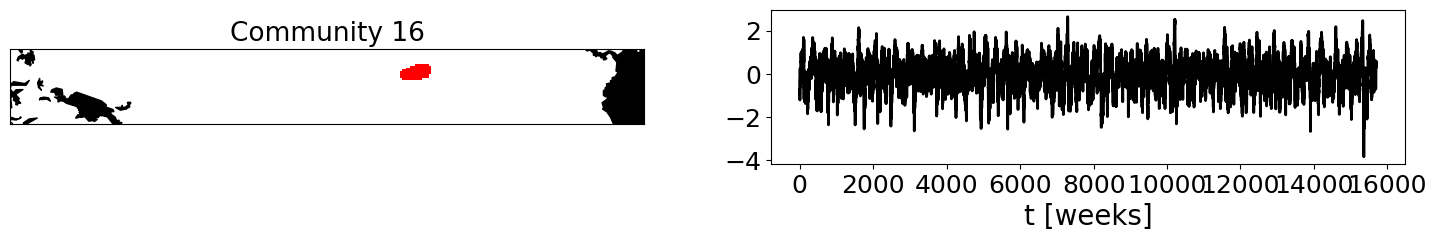

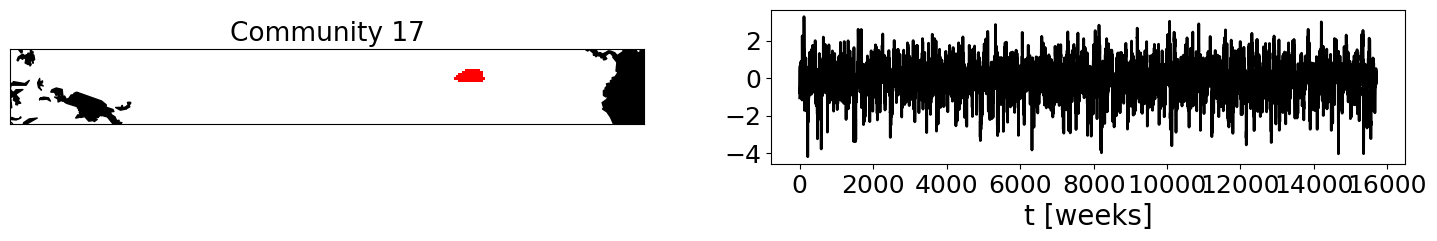

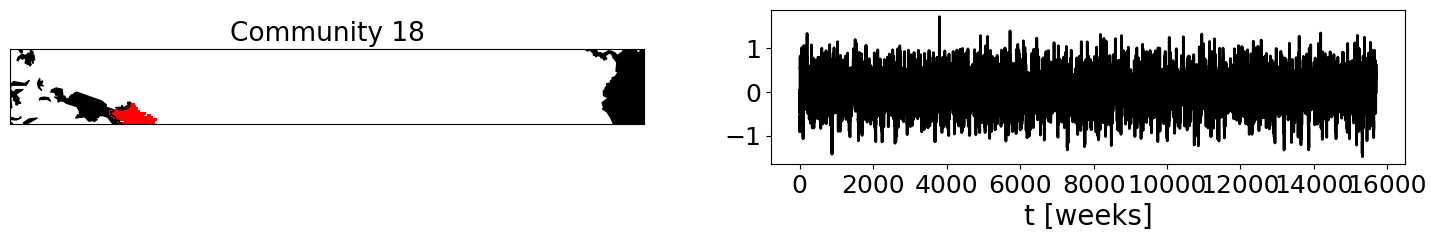

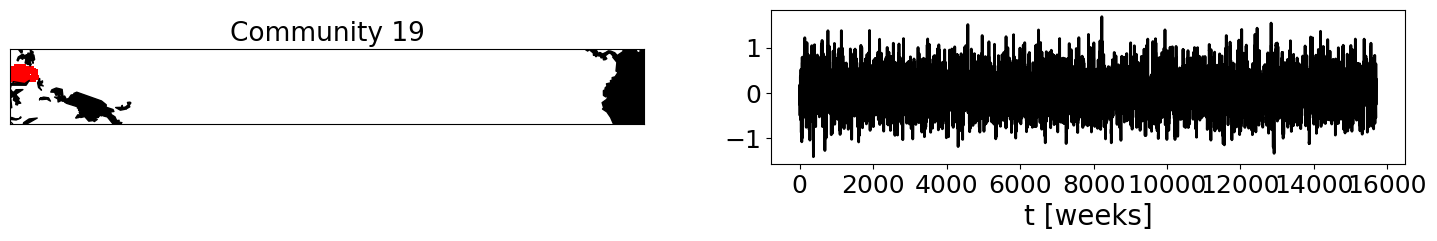

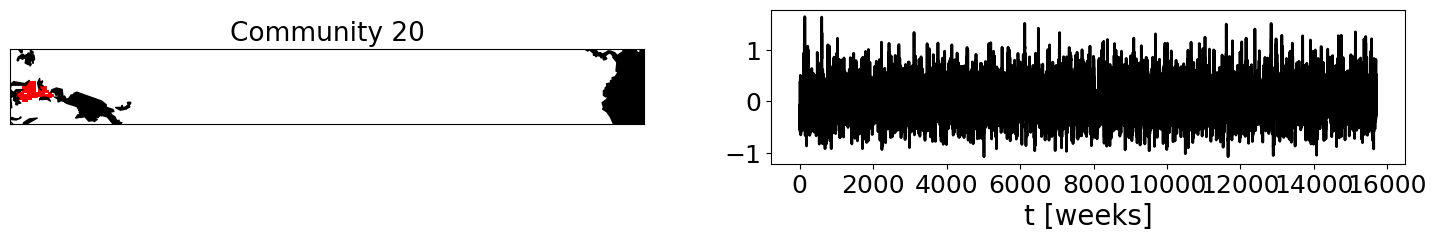

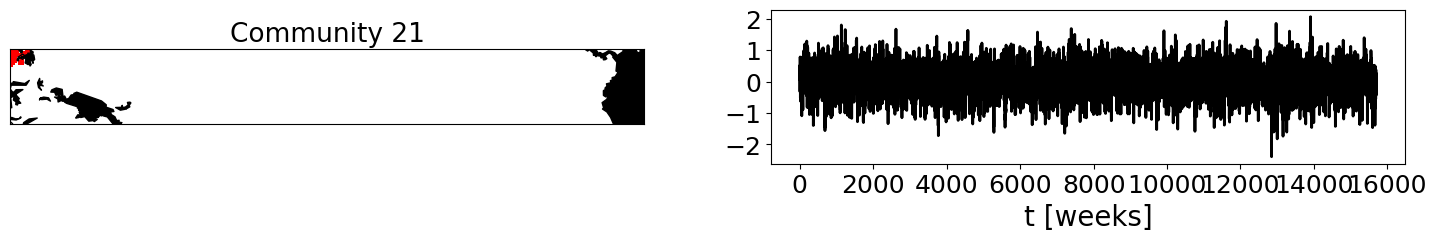

In [22]:
# Let's look at all average signals
for i in range(len(average_signals)):
    
    
    fig = plt.figure(figsize=(18,2))

    ax = fig.add_subplot(121)  
    
    map = Basemap(projection='cyl',
            llcrnrlat=-10,urcrnrlat=10,\
                llcrnrlon=120,urcrnrlon=290)
    map.drawcoastlines()
    #map.drawparallels(np.arange(-90.,100.,30.), \
    #  labels=[1,0,0,0],fontsize = 20,linewidth = 0)
    #map.drawmeridians(np.arange(0.,360.,60.), \
    #  labels=[0,0,0,1],fontsize = 20,linewidth = 0)
    map.fillcontinents(color = 'black')

        #cmap=discrete_cmap(50,base_cmap=plt.cm.jet)
    map.pcolor(longitudes,latitudes,single_communities[i],cmap=plt.cm.prism)
    #cb=plt.colorbar(location='bottom',aspect=20,pad=0.08)
    #cb.ax.tick_params(labelsize=37)
    
    # Plot domain id
    plt.title('Community '+str(i), fontsize = 19)

    
    ax = fig.add_subplot(122)  
    
    plt.plot(average_signals[i],"-k",linewidth = 2)
    plt.xlabel('t [weeks]',fontsize = 20)
    #ax.set_xticks([0,60,120,180,240,300,360,420])
    #ax.set_xticklabels(['1980','1985','1990','1995','2000','2005','2010','2015'])
    plt.ylabel('',fontsize = 20)
    plt.xticks(fontsize = 18)
    plt.yticks(fontsize = 18)
    
    plt.subplots_adjust(wspace=0.2, hspace=0)
    
    
    plt.show()

# Analyze correlograms

In [23]:
community_map = np.load('./results/community_map_infomap.npy')
single_communities = np.load('./results/single_communities_infomap.npy')
average_signals = np.load('./results/average_signals_infomap.npy')

In [24]:
single_communities.shape

(22, 40, 341)

In [25]:
import utils_linear_response

In [26]:
import utils

import utils_linear_response

standardize_signals = utils_linear_response.remove_mean(average_signals)
standardize_signals = utils_linear_response.standardize(standardize_signals)

correlograms = []
tau_range = 5000

for i in range(len(standardize_signals)):

    correlograms.append(utils.get_correlogram(standardize_signals[i],standardize_signals[i],tau_range))
    
correlograms = np.array(correlograms)    

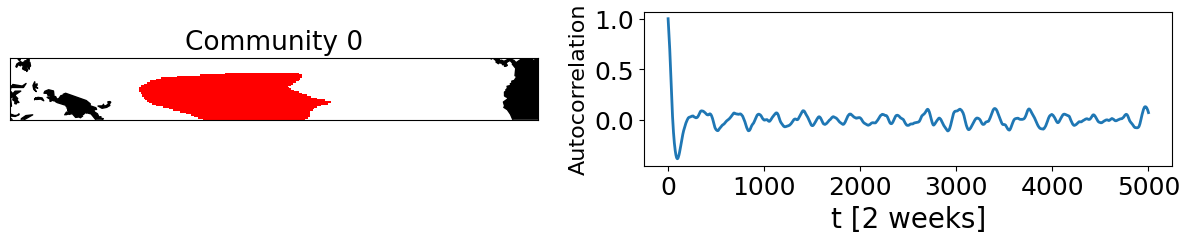

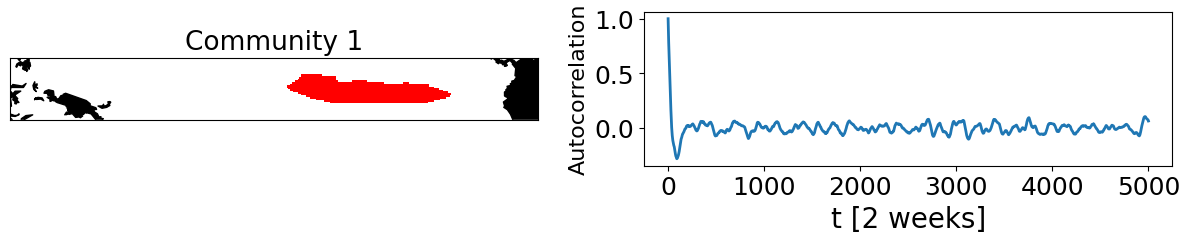

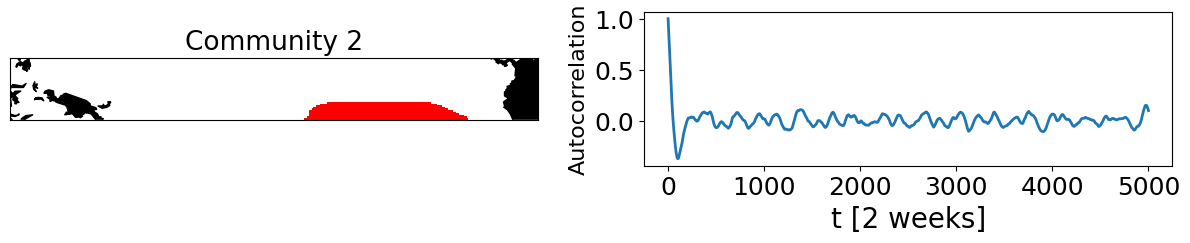

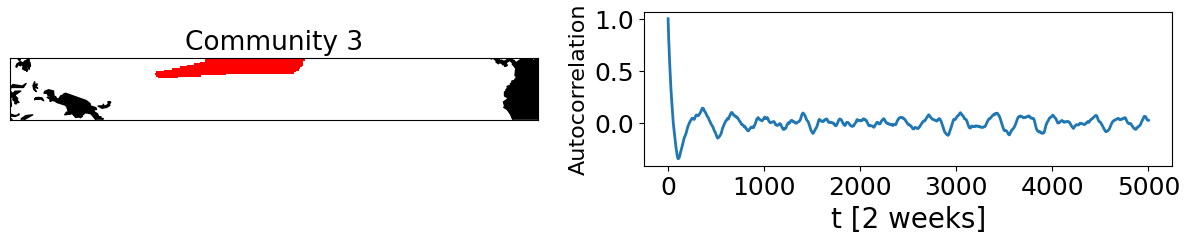

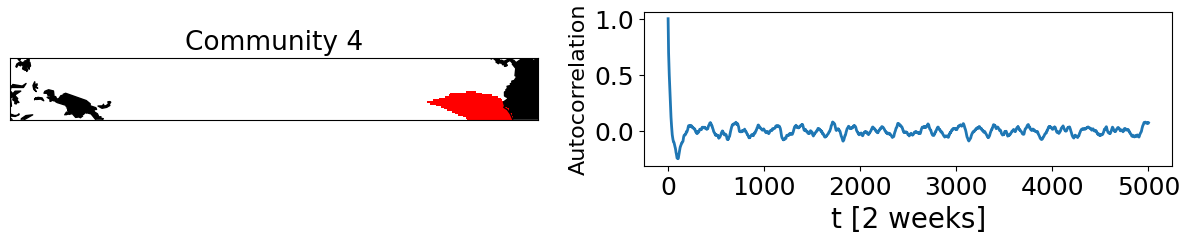

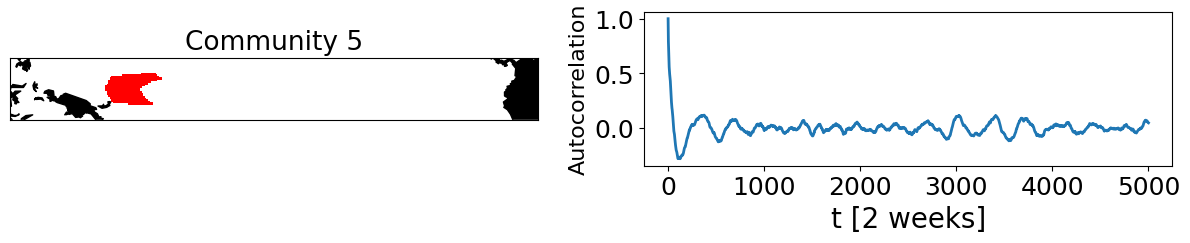

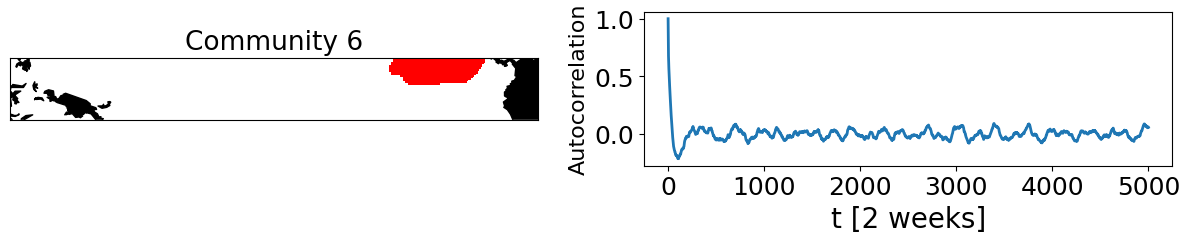

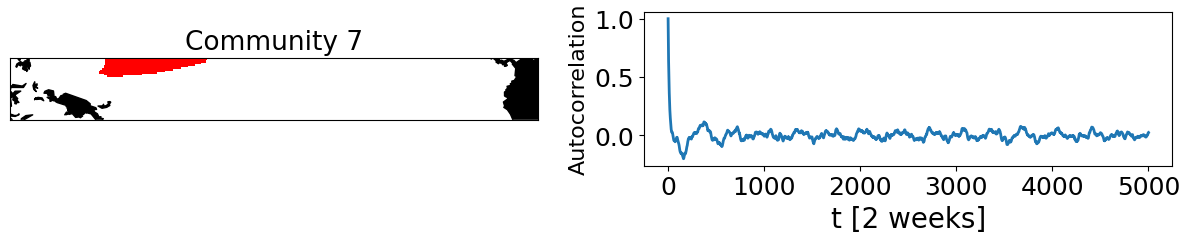

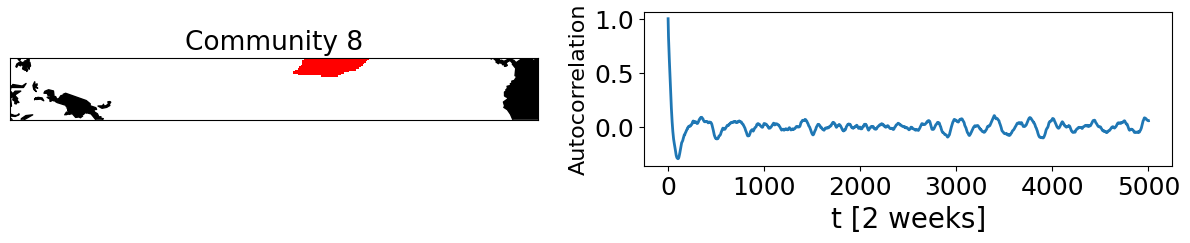

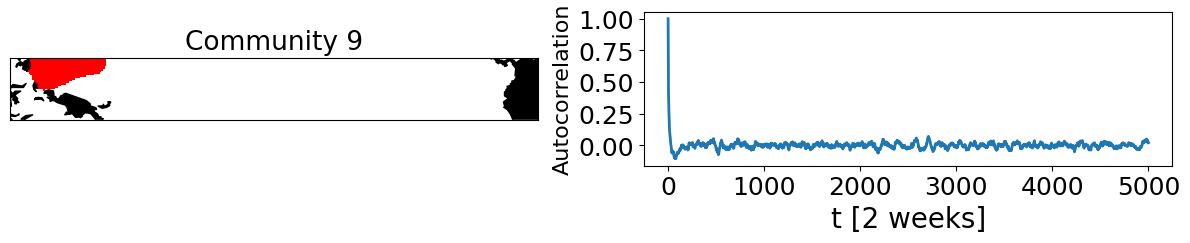

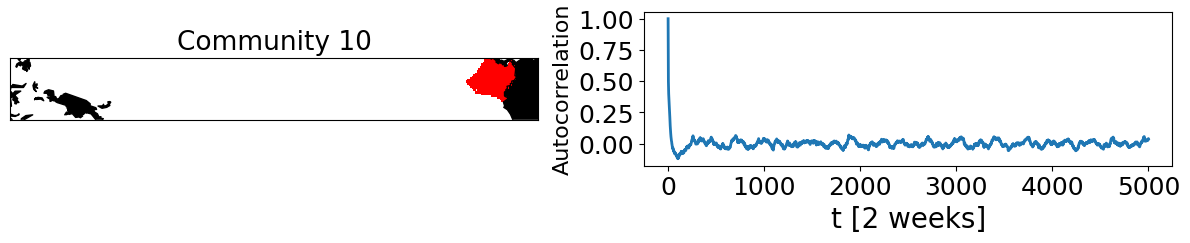

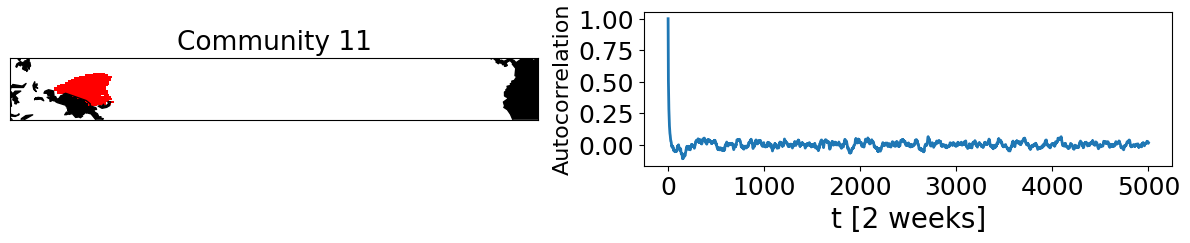

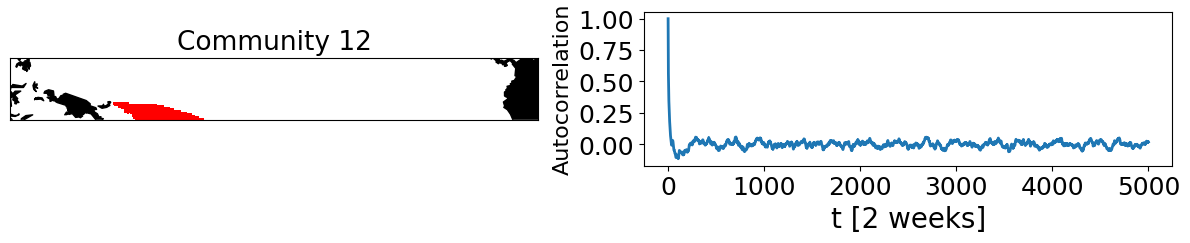

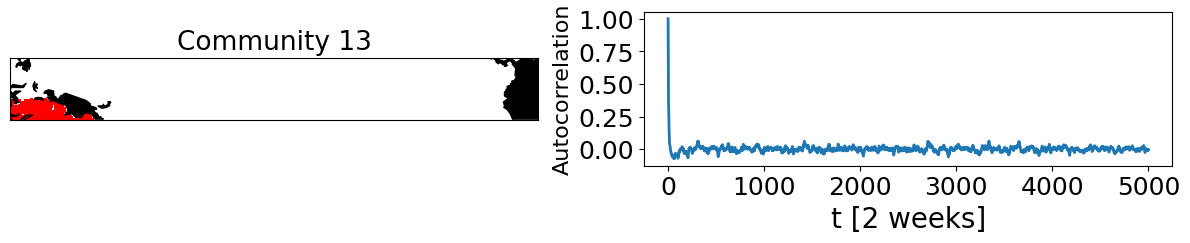

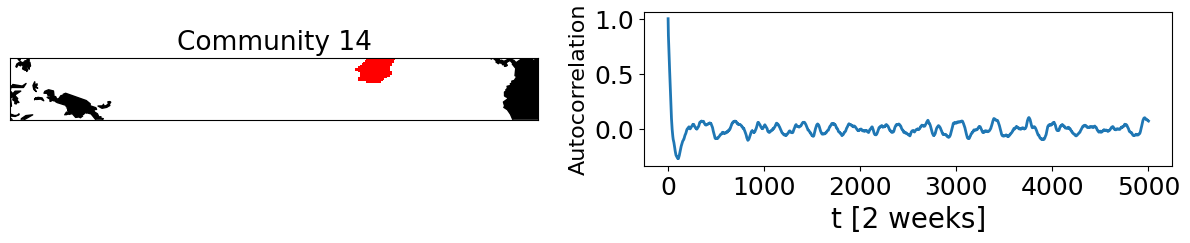

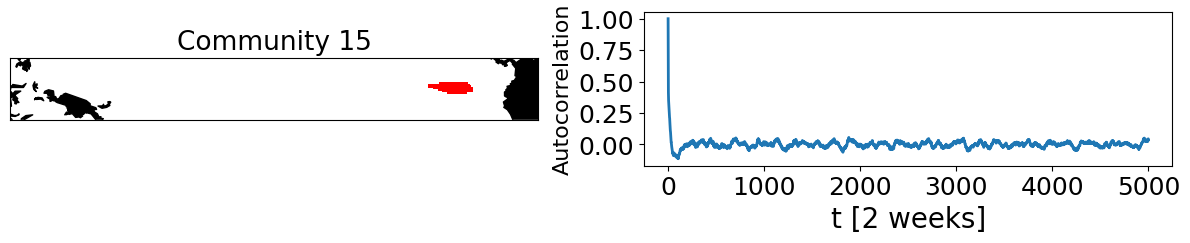

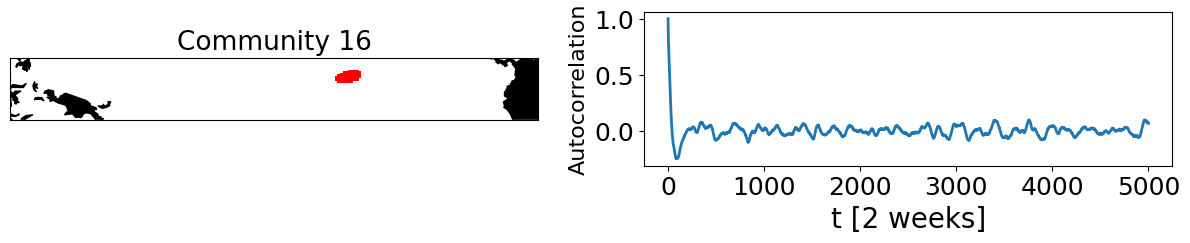

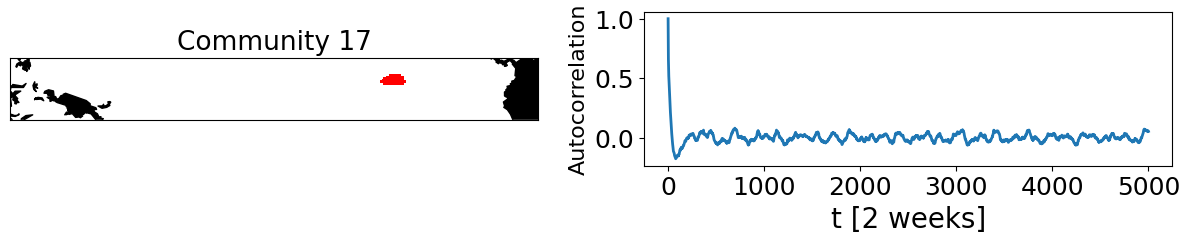

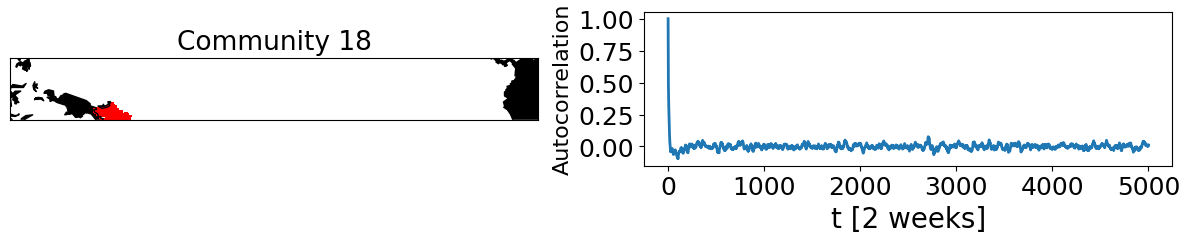

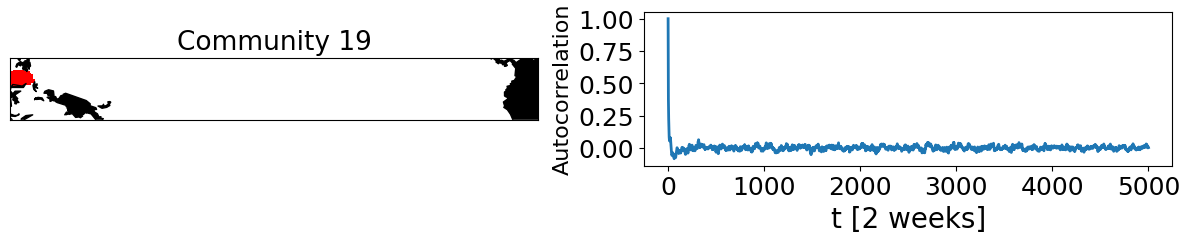

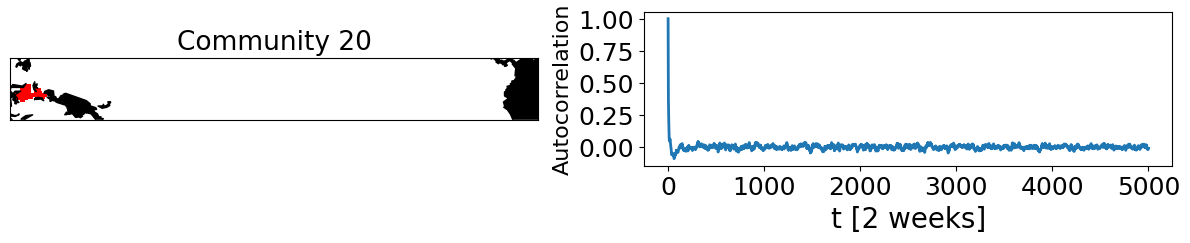

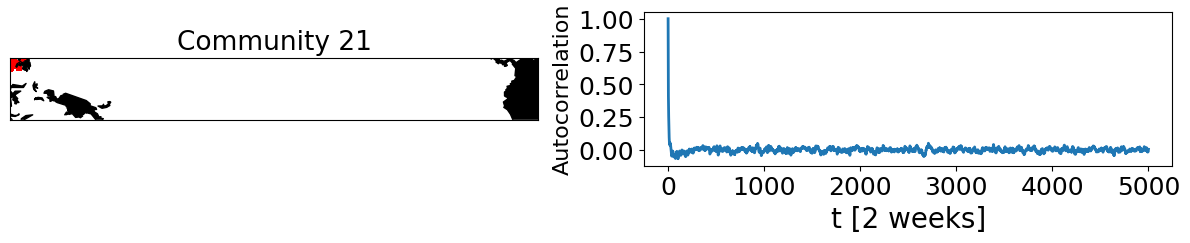

In [27]:
# Let's look at all average signals
for i in range(len(average_signals)):
    
    
    fig = plt.figure(figsize=(15,2))

    ax = fig.add_subplot(121)  
    
    map = Basemap(projection='cyl',
            llcrnrlat=-10,urcrnrlat=10,\
                llcrnrlon=120,urcrnrlon=290)
    map.drawcoastlines()
    #map.drawparallels(np.arange(-90.,100.,30.), \
    #  labels=[1,0,0,0],fontsize = 20,linewidth = 0)
    #map.drawmeridians(np.arange(0.,360.,60.), \
    #  labels=[0,0,0,1],fontsize = 20,linewidth = 0)
    map.fillcontinents(color = 'black')

        #cmap=discrete_cmap(50,base_cmap=plt.cm.jet)
    map.pcolor(longitudes,latitudes,single_communities[i],cmap=plt.cm.prism)
    #cb=plt.colorbar(location='bottom',aspect=20,pad=0.08)
    #cb.ax.tick_params(labelsize=37)
    
    # Plot domain id
    plt.title('Community '+str(i), fontsize = 19)

    
    ax = fig.add_subplot(122)  
    
    #plt.plot(average_signals[i],"-k",linewidth = 2)
    plt.plot(correlograms[i,tau_range:,0],correlograms[i,tau_range:,1],'-',linewidth = 2,markersize = 10)
    plt.xlabel('t [2 weeks]',fontsize = 20)
    #ax.set_xticks([0,60,120,180,240,300,360,420])
    #ax.set_xticklabels(['1980','1985','1990','1995','2000','2005','2010','2015'])
    plt.ylabel('Autocorrelation',fontsize = 16)
    plt.xticks(fontsize = 18)
    plt.yticks(fontsize = 18)
    
    plt.subplots_adjust(wspace=0.2, hspace=0)
    
    
    plt.show()

# A look at the histograms

In [28]:
community_map = np.load('./results/community_map_infomap.npy')
single_communities = np.load('./results/single_communities_infomap.npy')
average_signals = np.load('./results/average_signals_infomap.npy')

In [30]:
# First step: remove mean and standard deviation
normed_signals = average_signals.copy()

for i in range(len(normed_signals)):
    normed_signals[i] = (average_signals[i] - np.mean(average_signals[i]))/np.std(average_signals[i])

In [31]:
normed_signals.shape

(22, 15695)

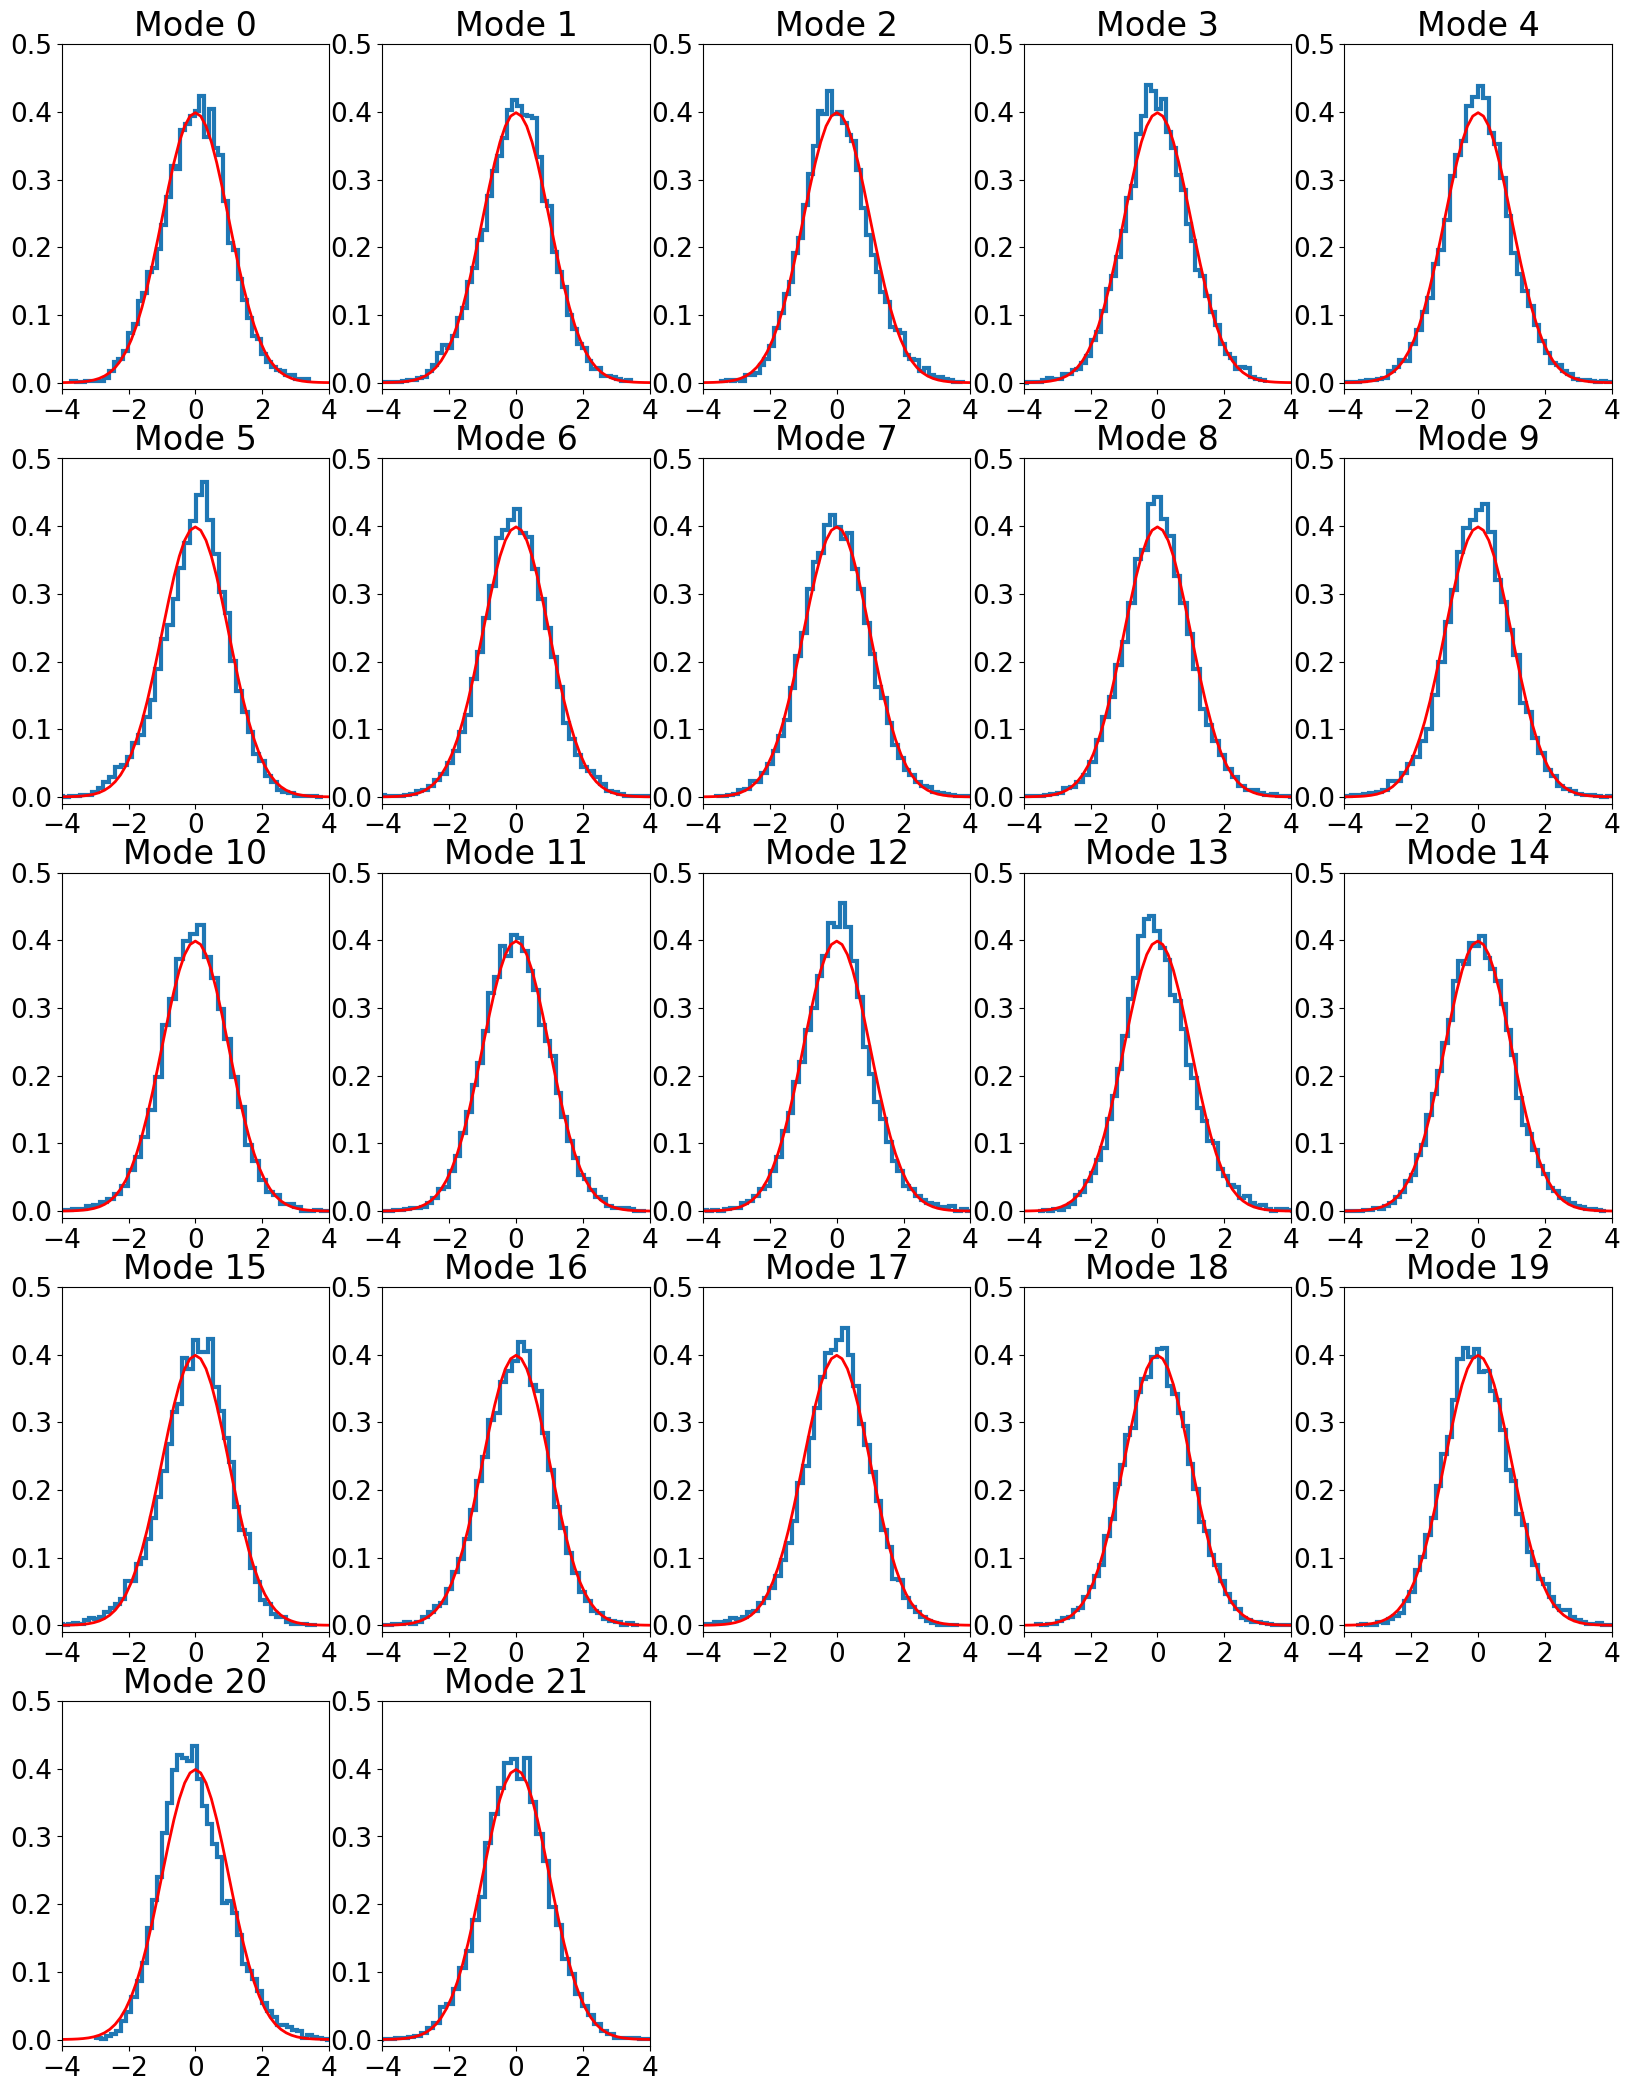

In [ ]:
fig = plt.figure(figsize=(20,26))

bns = 50
alpha_b = 1
fontsize_ticks = 19
fontsize_legend = 10

xlim_minus = -4
xlim_plus = +4

ylim_minus = -.01
ylim_plus = +0.5

i = 1

for i in np.arange(1,len(normed_signals)+1,1):

    ax = fig.add_subplot(5,5,i)  

    com = i - 1

    n, bins, patches = plt.hist(normed_signals[com], bins= bns, alpha = alpha_b, histtype = 'step',
                                linewidth = 3,rwidth=1,log = False, label= 'original',density=True)
    mu = np.mean(normed_signals[com])
    sigma = np.std(normed_signals[com])
    
    bins_gaussian = np.linspace(xlim_minus, xlim_plus, num=bns+1)
    
    plt.plot(bins_gaussian, 1/(sigma * np.sqrt(2 * np.pi)) *

                   np.exp( - (bins_gaussian - mu)**2 / (2 * sigma**2) ),

             linewidth=2, color='r')

    plt.xlim([xlim_minus,xlim_plus])
    plt.ylim([ylim_minus,ylim_plus])
    #plt.xlabel('SSTa',fontsize = fontsize_ticks)
    plt.title('Mode '+str(com),fontsize = 24)
    plt.xticks(fontsize = fontsize_ticks)
    plt.yticks(fontsize = fontsize_ticks)
    
fig.savefig('./figures/distributions_pacific.pdf',bbox_inches='tight') # bbox_inches='tight'

# Causality through linear response theory

This part can (should?) computed on the server Greene.

In [33]:
community_map = np.load('./results/community_map_infomap.npy')
single_communities = np.load('./results/single_communities_infomap.npy')
average_signals = np.load('./results/average_signals_infomap.npy')

In [34]:
import utils_linear_response

In [35]:
signals = average_signals

In [36]:
# Time length
n_time = np.shape(signals)[1]
# Number of time series
n_ts = np.shape(signals)[0]

In [37]:
np.shape(signals)

(22, 15695)

In [38]:
import utils_linear_response

In [39]:
# inputs
tau_max = 52 * 10  # ~10 years in weekly resolution
standardized = 'yes' # response computed via covariance functions

response_matrix_filter_10yrs = utils_linear_response.response(signals,tau_max,standardized)

In [40]:
np.save('./results/response_matrix_10yrs.npy',response_matrix_filter_10yrs)

In [42]:
############################## Step (a)
# Compute the lag 1 autocorrelation

# lag-1 autocorrelation
phi = utils_linear_response.phi_vector(signals)

############################## Step (b)
# Compute standard deviations of each time series

# sigmas
sigmas = utils_linear_response.sigmas(signals)

############################## Step (c)

# For each time series generate a null model
# and compute its responses

# Largest lag for response computation
tau_max = 52 * 10  # ~10 years in biweekly resolution
standardized = 'yes' # response computed via covariance functions


q_low, q_high = utils_linear_response.compute_quantile_analytical_tau_discrete(signals,phi,sigmas,tau_max,standardized='yes')

Memory demands:  0.001875162124633789 GB



In [43]:
np.save('./results/null_response_q0p999.npy',q_high)
np.save('./results/null_response_q001.npy',q_low)

# Analysis of Fluctuation Dissipation Relationship and Causality

In [44]:
# Not filtered
response_matrix = np.load('./results/response_matrix_10yrs.npy')
null_response_high_percentile = np.load('./results/null_response_q0p999.npy')
null_response_low_percentile = np.load('./results/null_response_q001.npy')
single_communities = np.load('./results/single_communities_infomap.npy')

## Causal strength

In [61]:
# Function to define node_strength with statistical significance
def node_strength_significance(response_matrix,significance_right_tail,significance_left_tail,absolute_value):
    
    # Inputs
    # - response_matrix
    # - significance_right_tail: for example the 99th percentile of the ensemble of null models
    # - significance_left_tail: for example the 1st percentile of the ensemble of null models
    # - absolute_values: 
    # - - yes: in this case the response is in absolute value
    # - - no: in this case the response is computed with the original value
    
    # Outputs:
    # - strengths_j_k: strength of the connection j -> k
    # If the original response matrix is n by n, strengths_j_k will be n x (n - 1)
    # as it will not consider self links
    
    time = np.shape(response_matrix)[0]
    # number of rows = number of columns = n
    n = np.shape(response_matrix)[1]
    
    # response_matrix_significant: assign zero if not significant
    response_matrix_significant = response_matrix.copy()
    
    for t in range(time):
        for j in range(n):
            for k in range(n):
                if ((response_matrix[t,k,j] < significance_right_tail[t,k,j]) and (response_matrix[t,k,j] > significance_left_tail[t,k,j])):
                    response_matrix_significant[t,k,j] = 0
    
    # Strength of link j -> k
    strengths_j_k = []
    
    for j in range(n):
        for k in range(n):
            if absolute_value == 'yes':
                # Response j -> k in absolute value
                response_j_k = np.abs(response_matrix_significant[1:,k,j])
            elif absolute_value == 'no':    
                # Response j -> k in absolute value
                response_j_k = response_matrix_significant[1:,k,j]
            # Compute strength of j -> k
            strengths_j_k.append(np.sum(response_j_k)) 
                
    strengths_j_k = np.array(strengths_j_k)
    strengths_j_k = strengths_j_k.reshape(n,n)
    #strengths_j_k = np.abs(strengths_j_k)
    
    # When computing strengths we remove the j -> j connection
    # remove diagonal
    strengths_j_k_off_diagonal = strengths_j_k[~np.eye(strengths_j_k.shape[0],dtype=bool)].reshape(strengths_j_k.shape[0],-1)
    
    # Strength of node j
    strengths_j = np.sum(strengths_j_k_off_diagonal,axis = 1)
    
    return strengths_j_k, strengths_j

In [87]:
absolute_value = 'yes'
strengths_j_k, strengths_j = node_strength_significance(response_matrix,null_response_high_percentile,null_response_low_percentile,absolute_value)

In [88]:
# Print a causal strength map
communities_strength_map = single_communities.copy()

for i in range(len(single_communities)):
    community_strength = strengths_j[i]
    communities_strength_map[i] = single_communities[i] * community_strength
    
strength_map_tos = np.nansum(communities_strength_map,axis = 0)
strength_map_tos[strength_map_tos == 0] = np.nan

In [89]:
# Load longitudes and latitudes
path = '/Users/fabrizio/Dropbox/Science_and_Co/POSTDOC/Analysis/Analysis/CM4/Dimensionality_Reduction_Modelling/model/dimensionality_reduction/Data/SST/Pacific/highpass/tos_300yrs_Pacific_a_0p5deg_weekly_land0_filtered.nc'

import utils

latitudes = utils.load_data(path,'lat')
latitudes = utils.masked_array_to_numpy(latitudes)

longitudes = utils.load_data(path,'lon')
longitudes = utils.masked_array_to_numpy(longitudes)

In [83]:
# Print causal strength maps

strength_Nino = single_communities.copy()
nino_index = 1


for k in range(len(single_communities)): 
    # enso
    strength_Nino[k] = single_communities[k] * strengths_j_k[nino_index,k]
    
# remove your self
strength_Nino = np.delete(strength_Nino,nino_index,axis=0)
    
strength_map_Nino = np.nansum(strength_Nino,axis = 0)

strength_map_Nino[np.isnan(strength_map_tos)] = np.nan

In [65]:
# save the strength map
np.save('./results/strength_map.npy',strength_map_tos)

In [75]:
np.save('./results/strength_map_Nino_sign.npy',strength_map_Nino)

In [94]:
np.nanmax(strength_map_Nino)

32.614468

In [93]:
np.nanmin(strength_map_Nino)

-10.770949

In [79]:
import cmocean

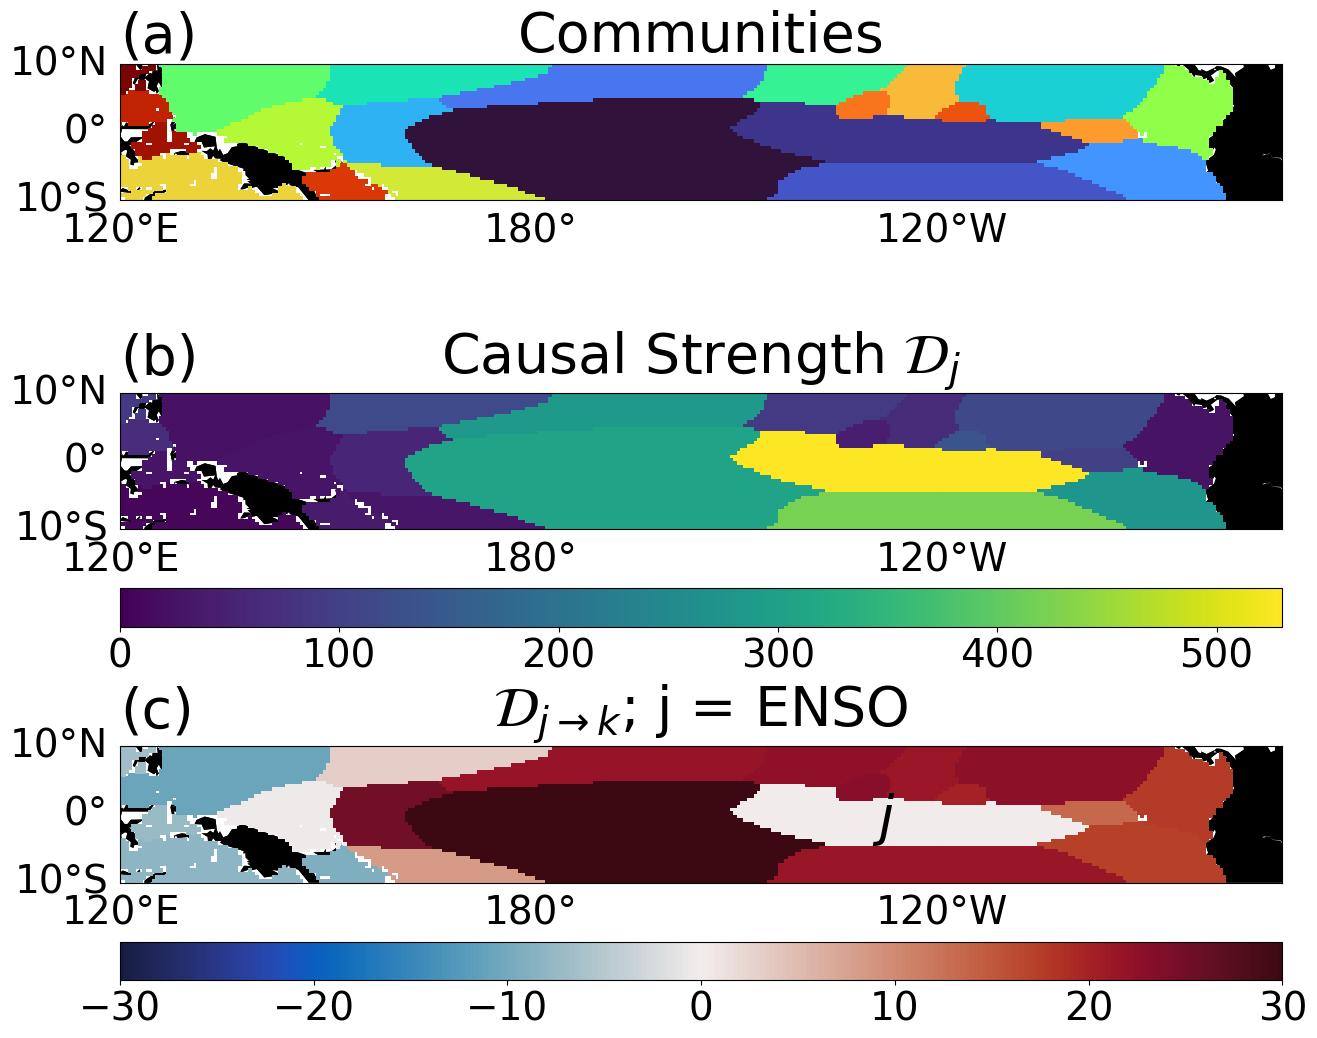

In [96]:
fig = plt.figure(figsize=(15,13))

vmin_enso = -30
vmax_enso = 30

ax = fig.add_subplot(311)  

map = Basemap(projection='cyl',
            llcrnrlat=-10,urcrnrlat=10,\
                llcrnrlon=120,urcrnrlon=290)
map.drawparallels(np.arange(-10.,15,10), \
  labels=[1,0,0,0],fontsize = 28,linewidth = 0.001)
map.drawmeridians(np.arange(0.,360.,60.), \
  labels=[0,0,0,1],fontsize = 28,linewidth = 0.001)
map.fillcontinents(color = 'black')
map.fillcontinents(color = 'black')

#cmap=discrete_cmap(50,base_cmap=plt.cm.jet)
map.pcolor(longitudes,latitudes,community_map,cmap=plt.cm.turbo)
#cb=plt.colorbar(location='bottom',aspect=20,pad=0.08)
#cb.ax.tick_params(labelsize=37)
#plt.text(220,-2,'$x$',fontsize=24,c = 'w')
#plt.text(190,-2,'$y$',fontsize=24,c = 'w')
    
# Plot domain id
plt.title( '(a)', loc = 'left',fontsize=40)
plt.title( 'Communities',fontsize=40)

ax = fig.add_subplot(312)  
    
map = Basemap(projection='cyl',
            llcrnrlat=-10,urcrnrlat=10,\
                llcrnrlon=120,urcrnrlon=290)
#map.drawcoastlines()
map.drawparallels(np.arange(-10.,15,10), \
  labels=[1,0,0,0],fontsize = 28,linewidth = 0.001)
map.drawmeridians(np.arange(0.,360.,60.), \
  labels=[0,0,0,1],fontsize = 28,linewidth = 0.001)
map.fillcontinents(color = 'black')
map.fillcontinents(color = 'black')

#cmap=discrete_cmap(50,base_cmap=plt.cm.jet)
map.pcolor(longitudes,latitudes,strength_map_tos,cmap=plt.cm.viridis,vmin = 0)
cb=plt.colorbar(location='bottom',aspect=30,pad=0.2)
cb.ax.tick_params(labelsize=28)
    
# Plot domain id
plt.title( '(b)', loc = 'left',fontsize=40)
plt.title( 'Causal Strength '+r'$\mathcal{D}_{j}$',fontsize=40)

ax = fig.add_subplot(313)  
    
map = Basemap(projection='cyl',
            llcrnrlat=-10,urcrnrlat=10,\
                llcrnrlon=120,urcrnrlon=290)
#map.drawcoastlines()
map.drawparallels(np.arange(-10.,15,10), \
  labels=[1,0,0,0],fontsize = 28,linewidth = 0.001)
map.drawmeridians(np.arange(0.,360.,60.), \
  labels=[0,0,0,1],fontsize = 28,linewidth = 0.001)
map.fillcontinents(color = 'black')
map.fillcontinents(color = 'black')

#cmap=discrete_cmap(50,base_cmap=plt.cm.jet)
map.pcolor(longitudes,latitudes,strength_map_Nino,cmap=cmocean.cm.balance,vmin = vmin_enso, vmax = vmax_enso)
cb=plt.colorbar(location='bottom',aspect=30,pad=0.2)
cb.ax.tick_params(labelsize=28)

plt.text(230,-3,'$j$',fontsize=40,c = 'k')
    
# Plot domain id
plt.title( '(c)', loc = 'left',fontsize=40)
plt.title(r'$\mathcal{D}_{j \rightarrow k}$; j = ENSO', fontsize = 40)

fig.savefig('./figures/causal_link_maps.pdf',bbox_inches='tight') # bbox_inches='tight'

## Focus on single domains

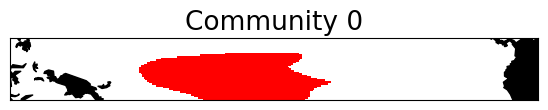

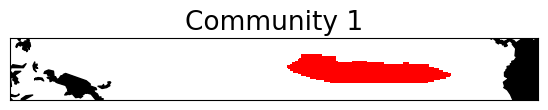

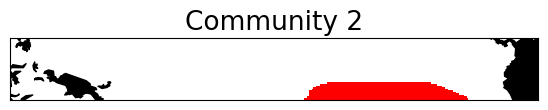

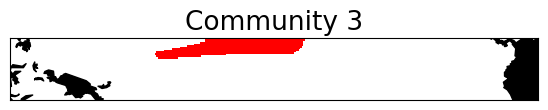

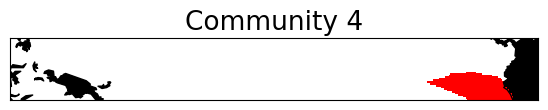

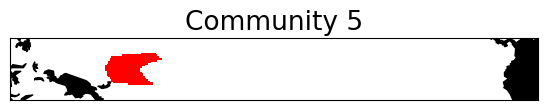

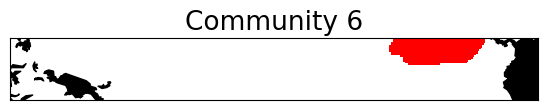

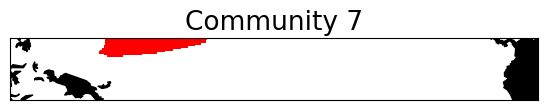

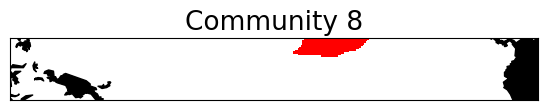

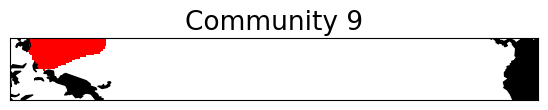

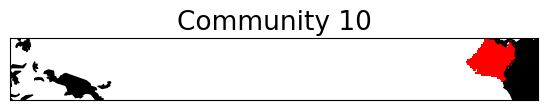

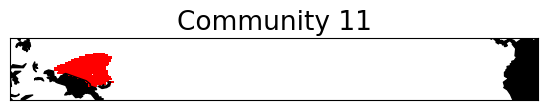

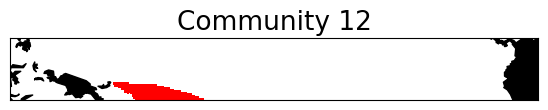

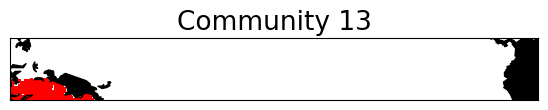

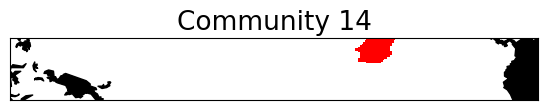

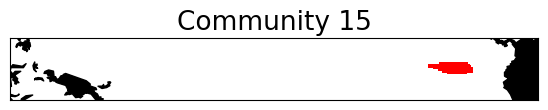

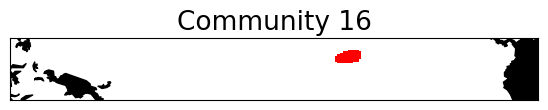

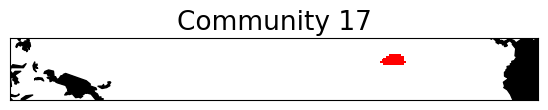

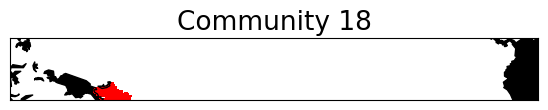

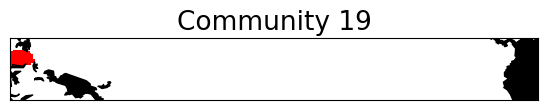

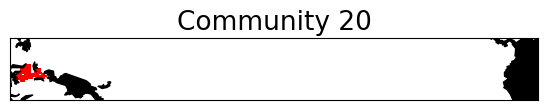

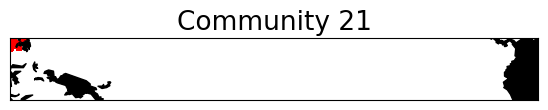

In [52]:
for j in range(len(single_communities)):

    fig = plt.figure(figsize=(15,2))

    #j = 3

    ax = fig.add_subplot(121)  

    map = Basemap(projection='cyl',
            llcrnrlat=-10,urcrnrlat=10,\
                llcrnrlon=120,urcrnrlon=290)
    map.drawcoastlines()
    #map.drawparallels(np.arange(-90.,100.,30.), \
    #  labels=[1,0,0,0],fontsize = 20,linewidth = 0)
    #map.drawmeridians(np.arange(0.,360.,60.), \
    #  labels=[0,0,0,1],fontsize = 20,linewidth = 0)
    map.fillcontinents(color = 'black')

        #cmap=discrete_cmap(50,base_cmap=plt.cm.jet)
    map.pcolor(longitudes,latitudes,single_communities[j],cmap=plt.cm.prism)
    #cb=plt.colorbar(location='bottom',aspect=20,pad=0.08)
    #cb.ax.tick_params(labelsize=37)

    # Plot domain id
    plt.title('Community '+str(j), fontsize = 19)


    plt.show()

### Consider linkages

In [53]:
# Not filtered
response_matrix = np.load('./results/response_matrix_10yrs.npy')
null_response_high_percentile = np.load('./results/null_response_q0p999.npy')
null_response_low_percentile = np.load('./results/null_response_q001.npy')
single_communities = np.load('./results/single_communities_infomap.npy')

### Community j = 1 ---> k (Around Niño 3.4)

Let's check who is Niño 3.4 leading

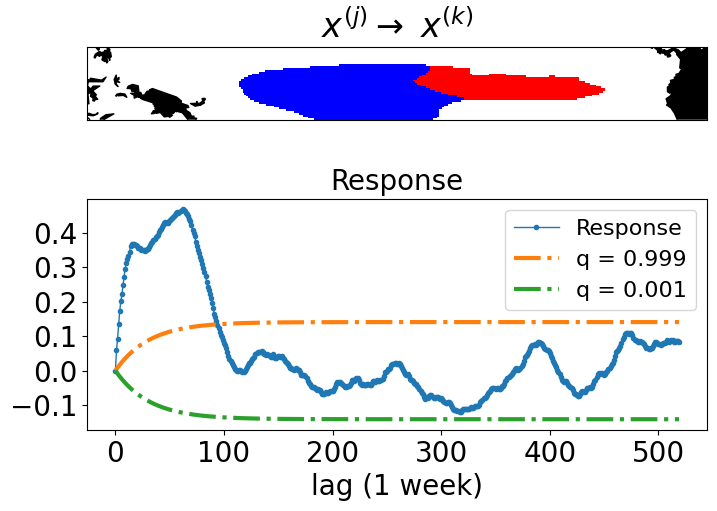

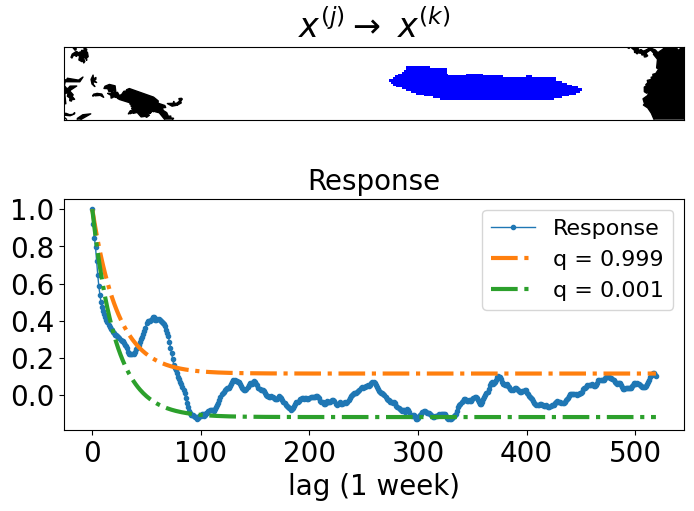

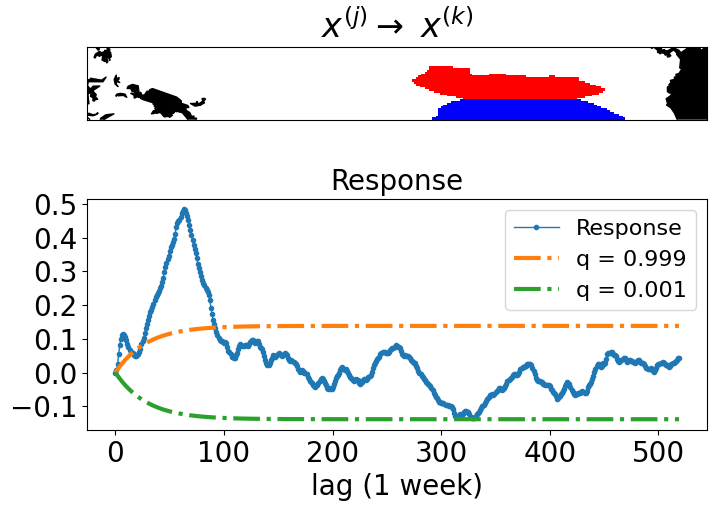

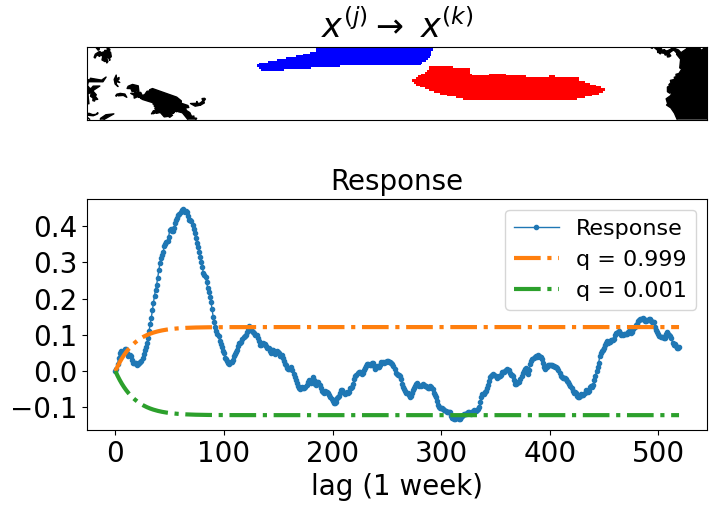

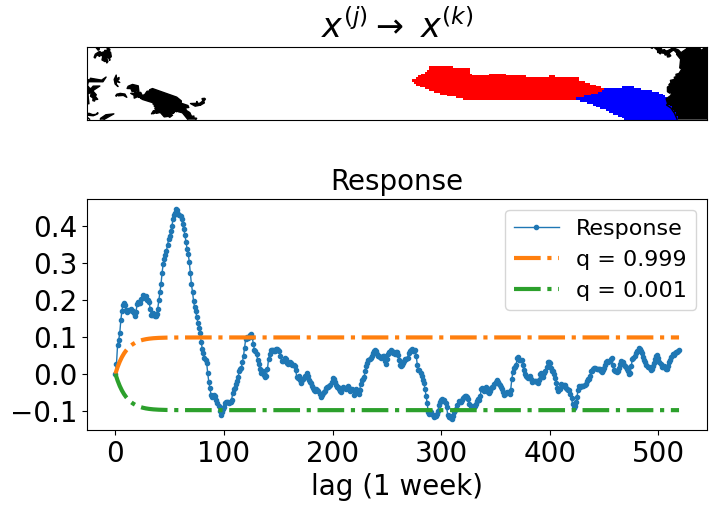

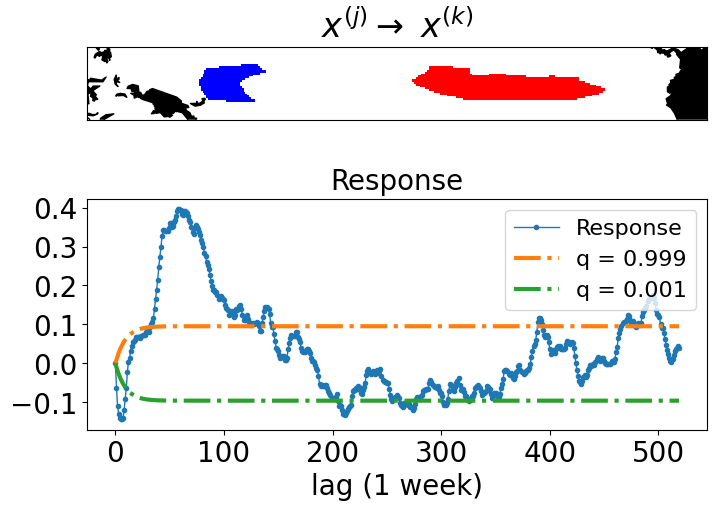

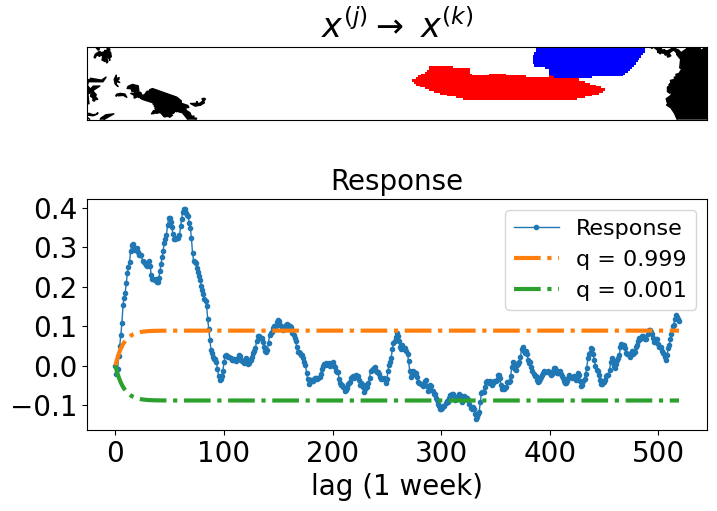

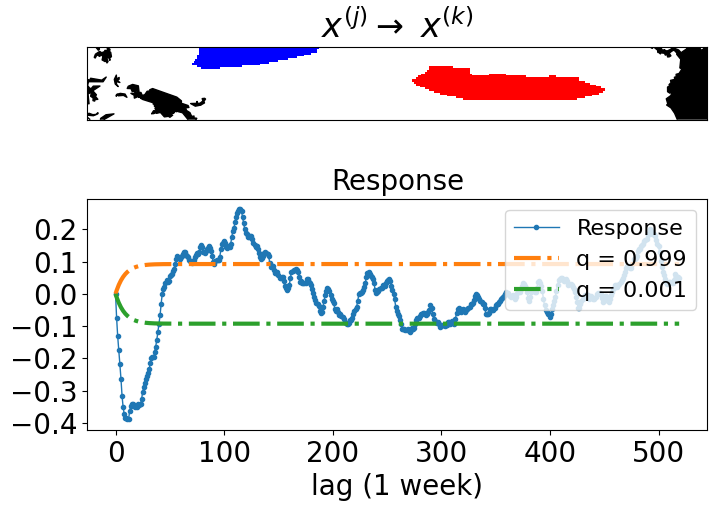

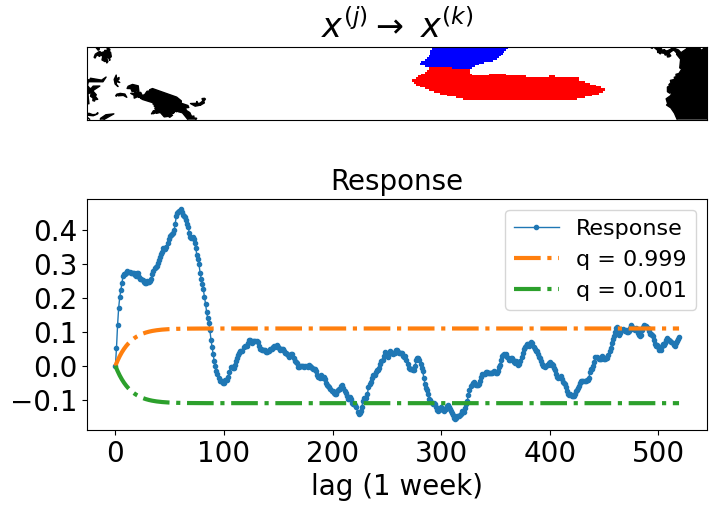

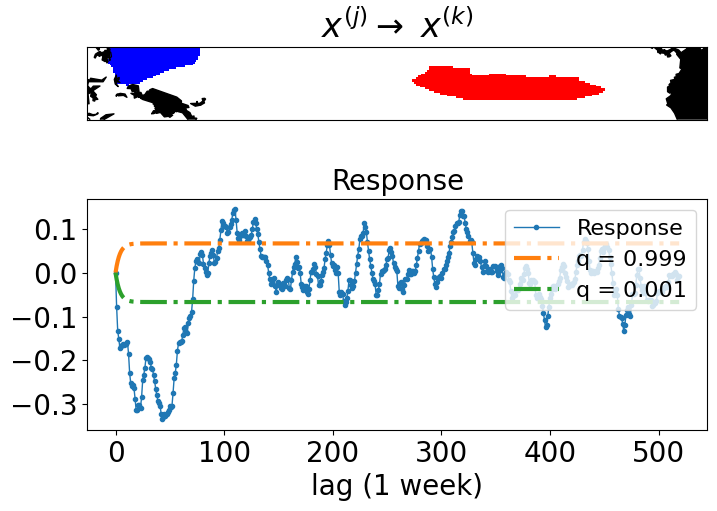

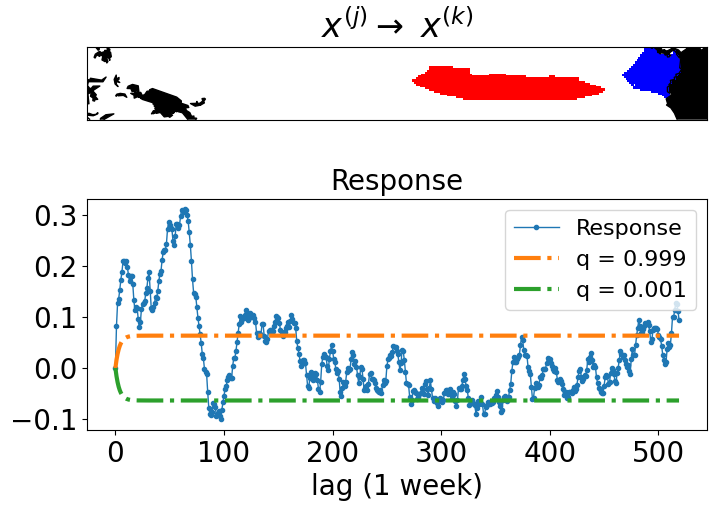

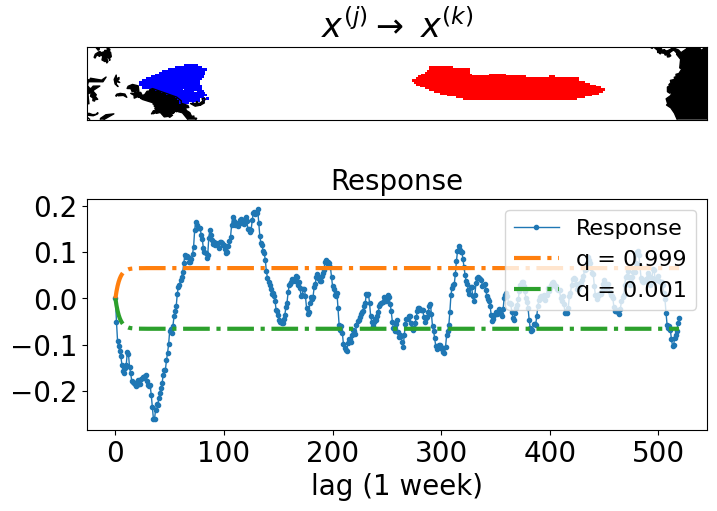

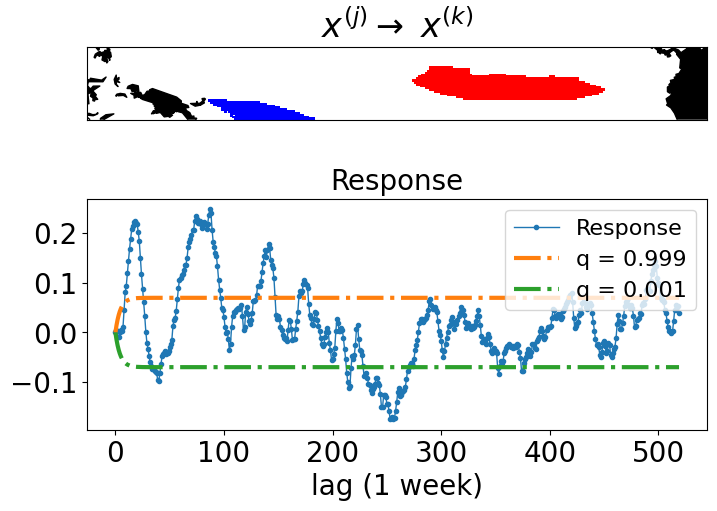

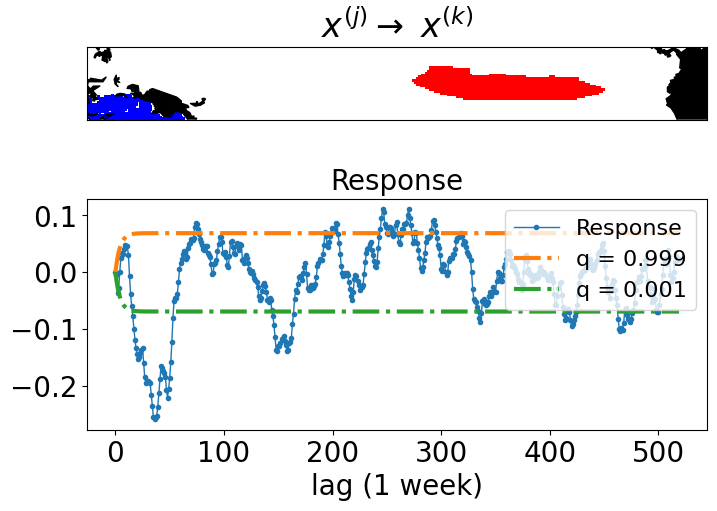

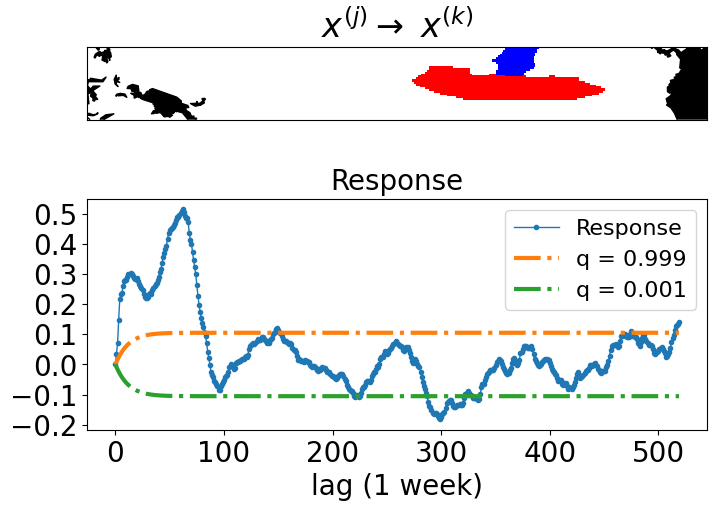

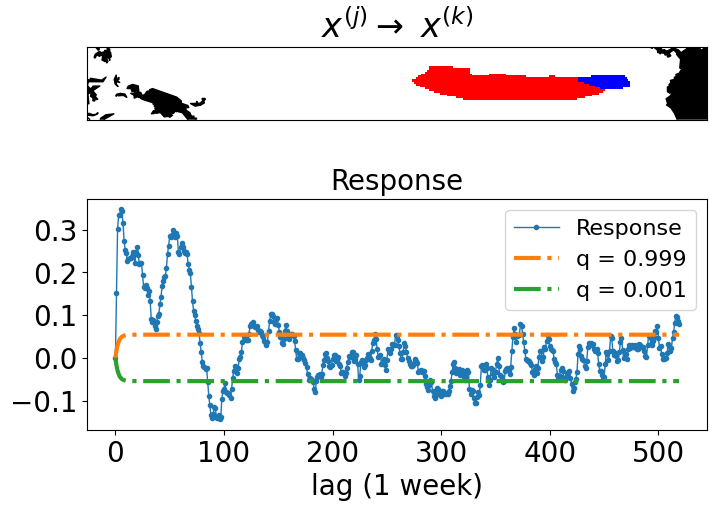

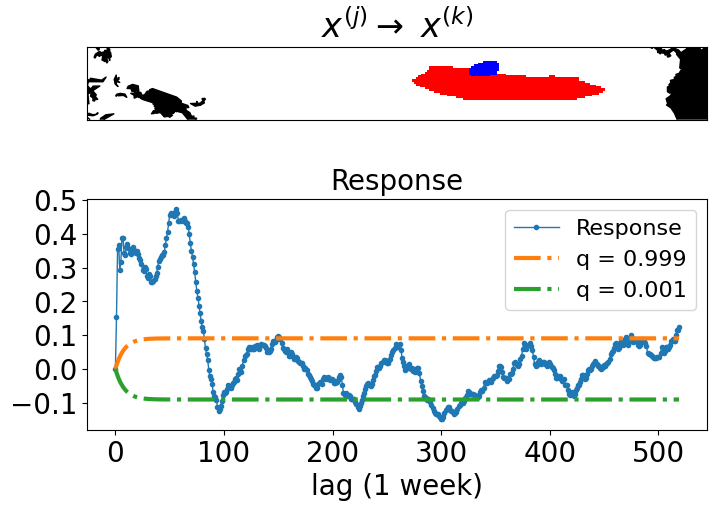

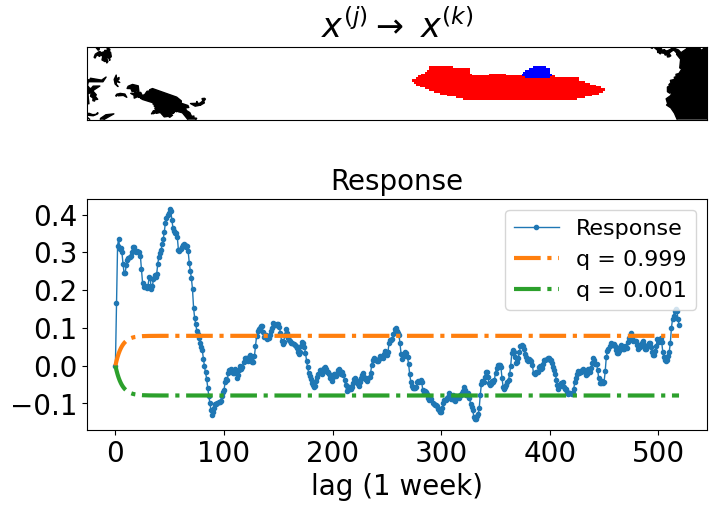

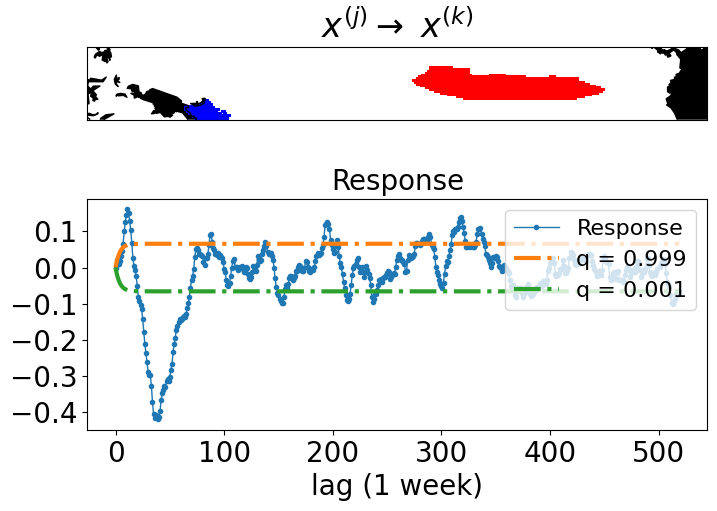

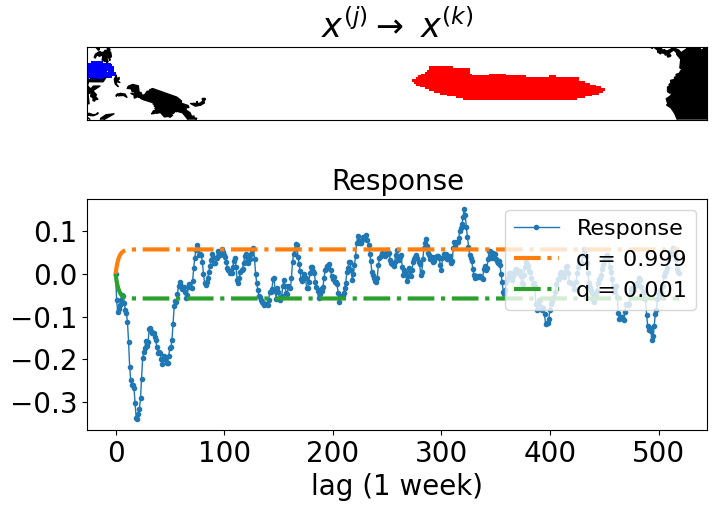

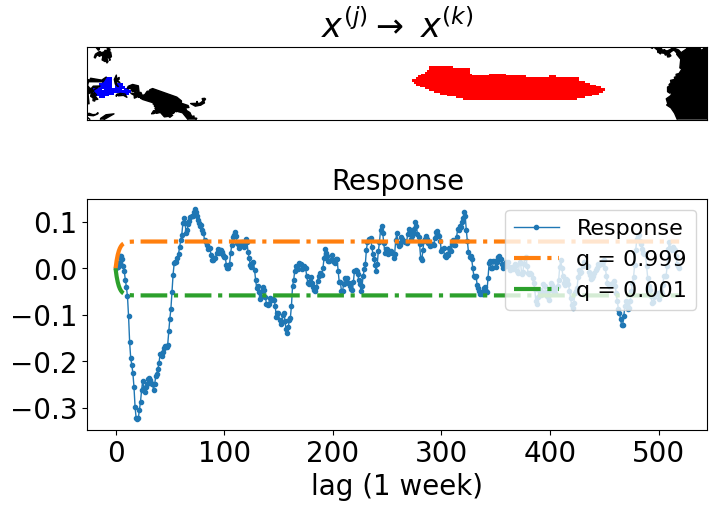

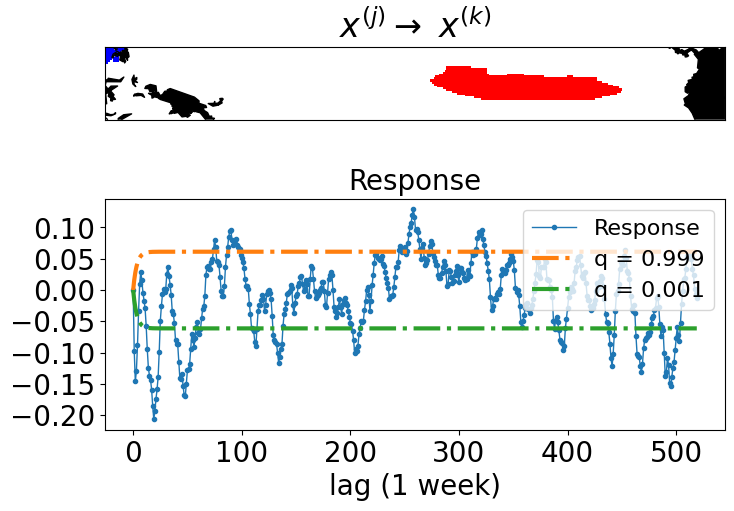

In [56]:
# Let's check the causal link j -> k where 
# k = 12 is the Gulf Of Mexico 
# So we are checking the relationship between every other domain and the GoM

j = 1

# Let's look at all average signals
for k in range(len(single_communities)):
    
    
    fig = plt.figure(figsize=(8,6))

    ax = fig.add_subplot(211)  
    
    map = Basemap(projection='cyl',
            llcrnrlat=-10,urcrnrlat=10,\
                llcrnrlon=120,urcrnrlon=290)
    map.drawcoastlines()
    #map.drawparallels(np.arange(-90.,100.,30.), \
    #  labels=[1,0,0,0],fontsize = 20,linewidth = 0)
    #map.drawmeridians(np.arange(0.,360.,60.), \
    #  labels=[0,0,0,1],fontsize = 20,linewidth = 0)
    map.fillcontinents(color = 'black')

    #cmap=discrete_cmap(50,base_cmap=plt.cm.jet)
    map.pcolor(longitudes,latitudes,single_communities[j],cmap = plt.cm.bwr_r,label='#5')
    map.pcolor(longitudes,latitudes,single_communities[k],cmap=plt.cm.bwr,label='#'+str(k))
    #cb=plt.colorbar(location='bottom',aspect=20,pad=0.08)
    #cb.ax.tick_params(labelsize=37)
    
    # Plot domain id
    plt.title('$x^{(j)}$'+ r'$\rightarrow$ '+'$x^{(k)}$', fontsize = 24)

    
    ax = fig.add_subplot(212)  
    
    plt.plot(response_matrix[:,k,j],'.-',label = 'Response',linewidth = 1,markersize = 6)
    plt.plot(null_response_high_percentile[:,k,j],'-.',linewidth = 3,label='q = 0.999')
    plt.plot(null_response_low_percentile[:,k,j],'-.',linewidth = 3,label='q = 0.001')
    #plt.plot(null_response_99p9_percentile[:,k,j],'-.',label = '$q = 1 - 10^{-5}$',linewidth = 3)
    #plt.plot(null_response_0p1_percentile[:,k,j],'-.',label = '$q = 10^{-5}$',linewidth = 3)
    #plt.plot(null_response_99_percentile[:,k,j],'-.',label = '99th percentile',color = 'tab:red',linewidth = 3)
    #plt.plot(null_response_1_percentile[:,k,j],'-.',label = '1st percentile',color = 'tab:red',linewidth = 3)

    plt.legend(loc = 'upper right',fontsize = 16)

    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    #ax.set_xticks([0,5,10,15,20])
    #ax.set_xticklabels(['0','5','10','15','20'])

    plt.xlabel('lag (1 week)',fontsize = 20)
    plt.title('Response',fontsize = 20)

    
    plt.subplots_adjust(wspace=0.15, hspace=0)
    
    
    plt.show()
    
    #fig.savefig('./figures/Infomap/q0p95/no_heuristics/ElNino_connections/ElNino_Linkages_'+str(k)+'.eps',bbox_inches='tight') # bbox_inches='tight'

### Community j = 0 ---> k 

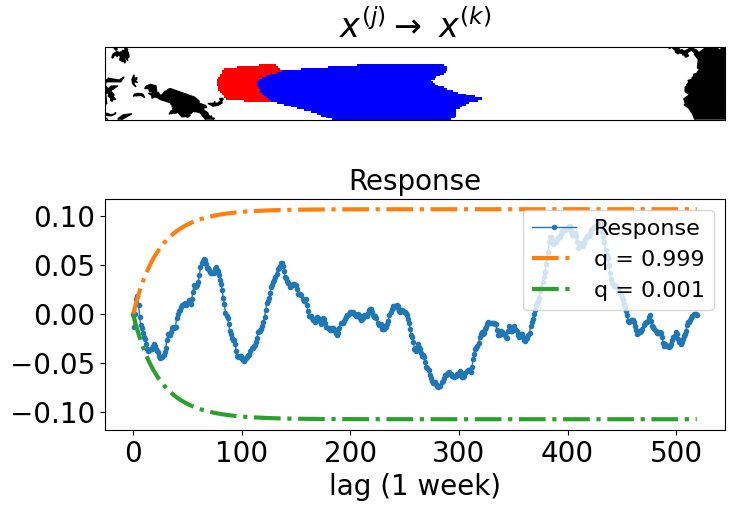

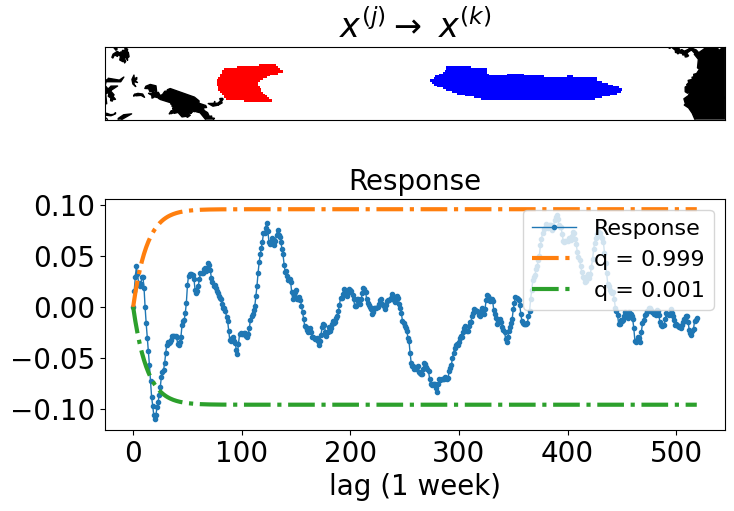

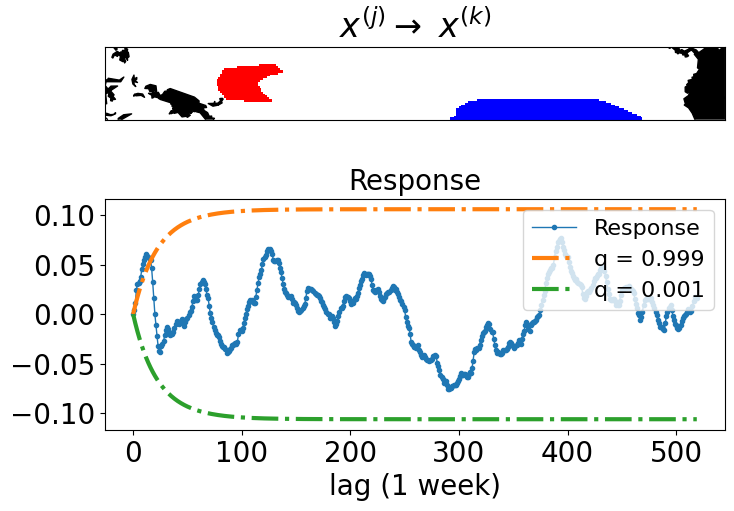

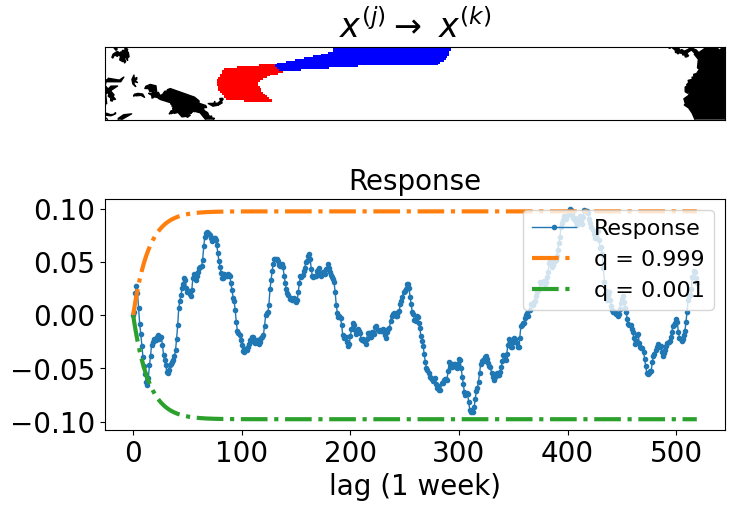

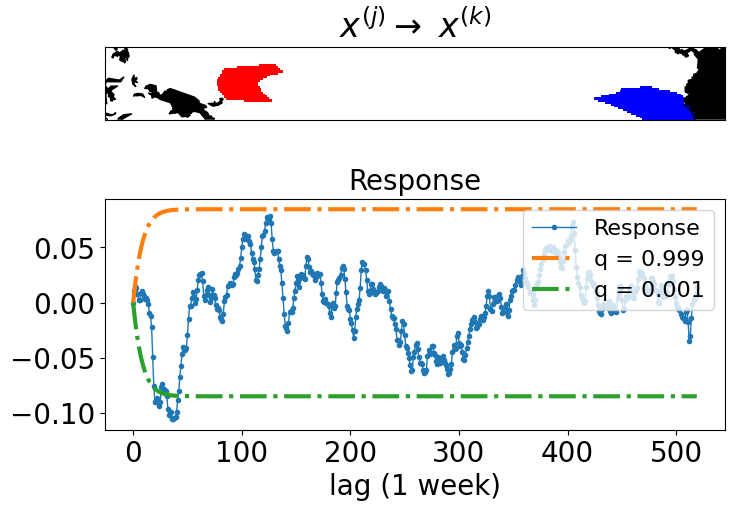

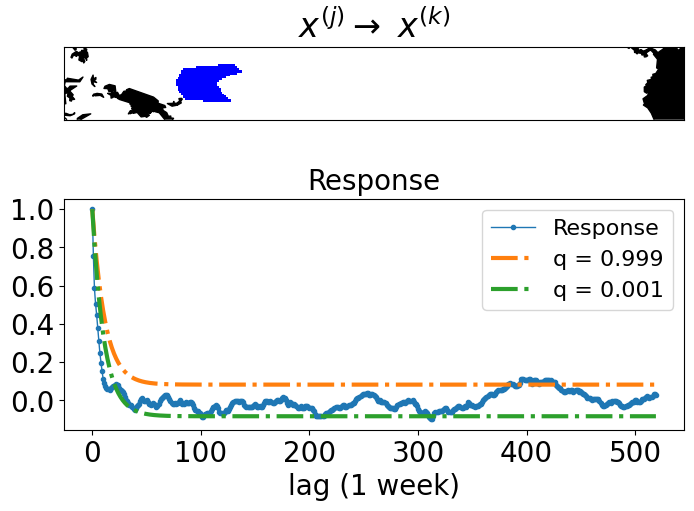

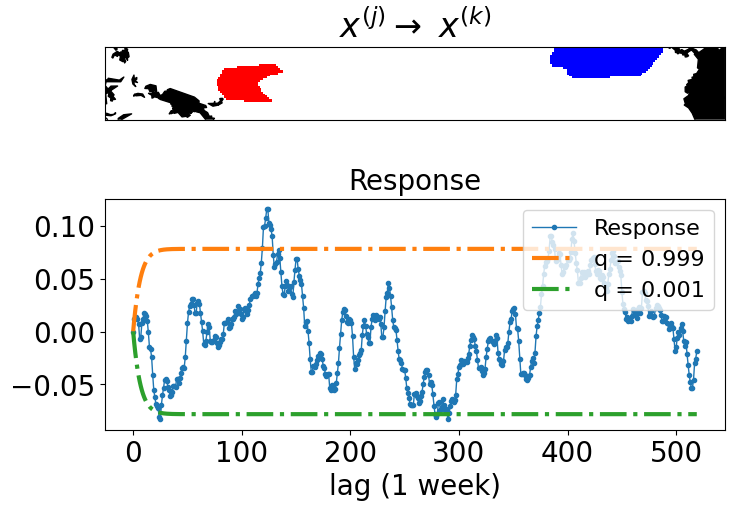

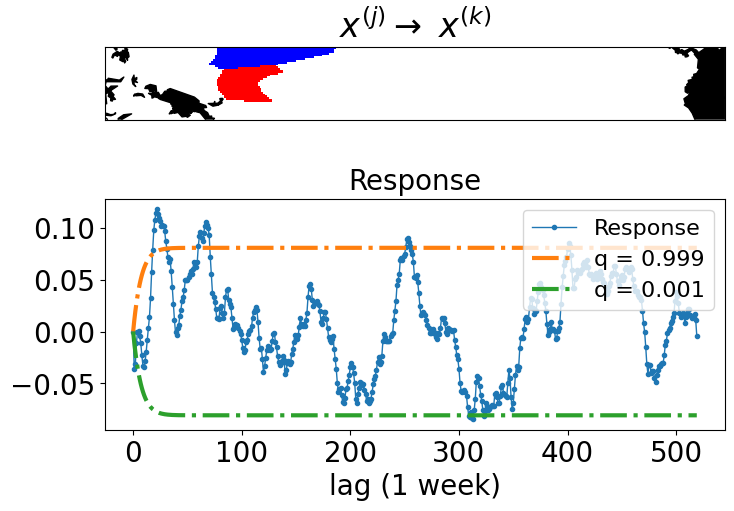

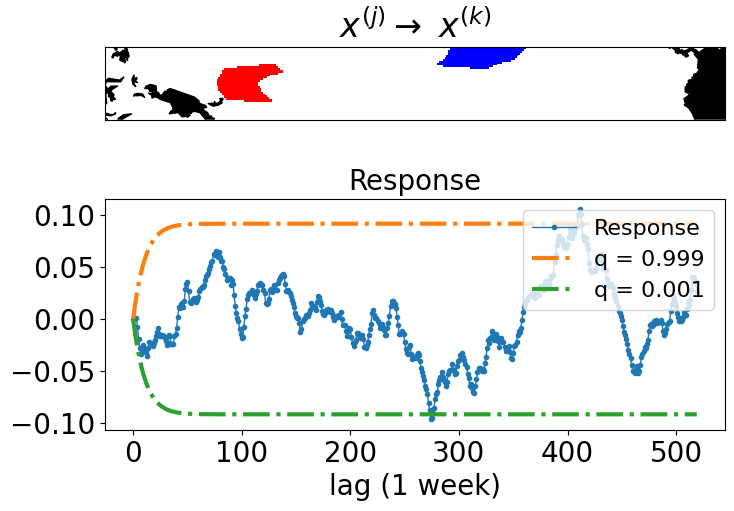

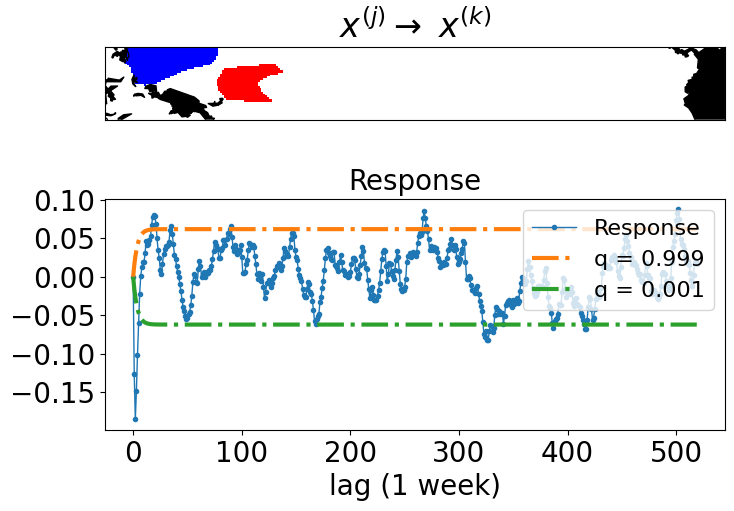

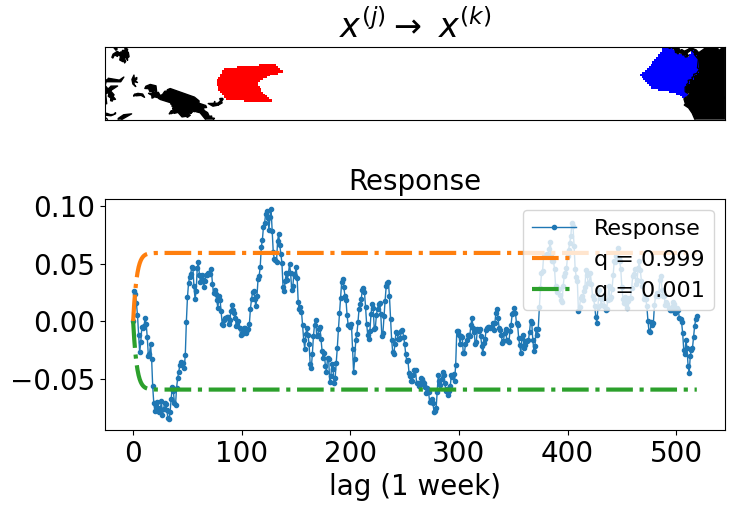

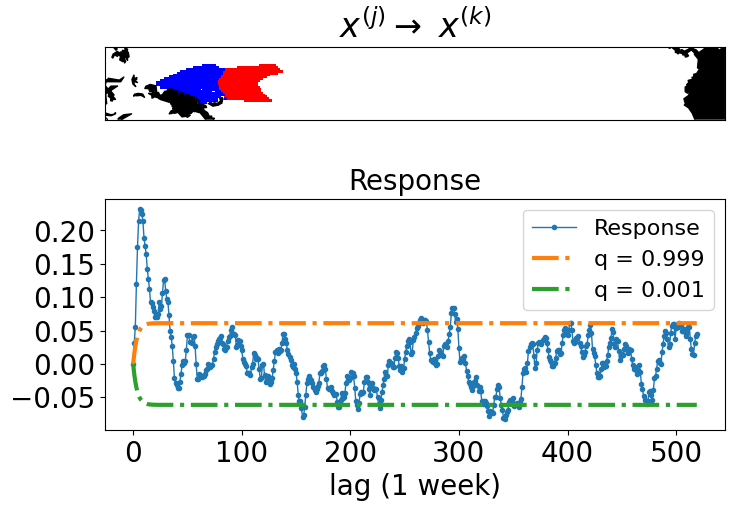

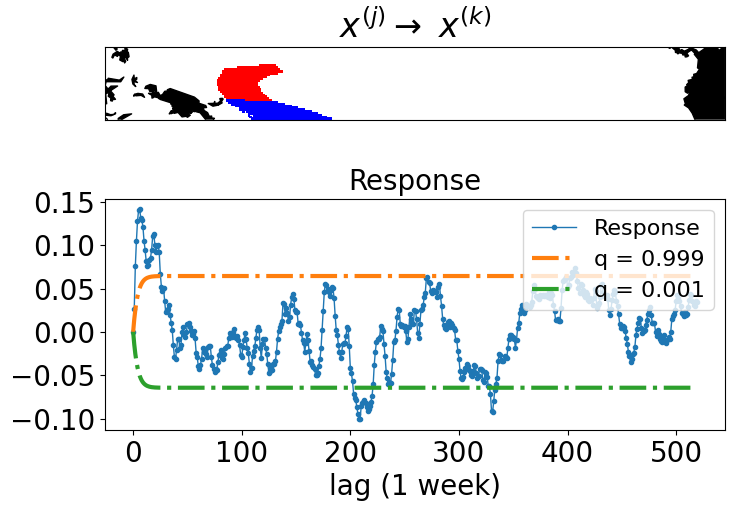

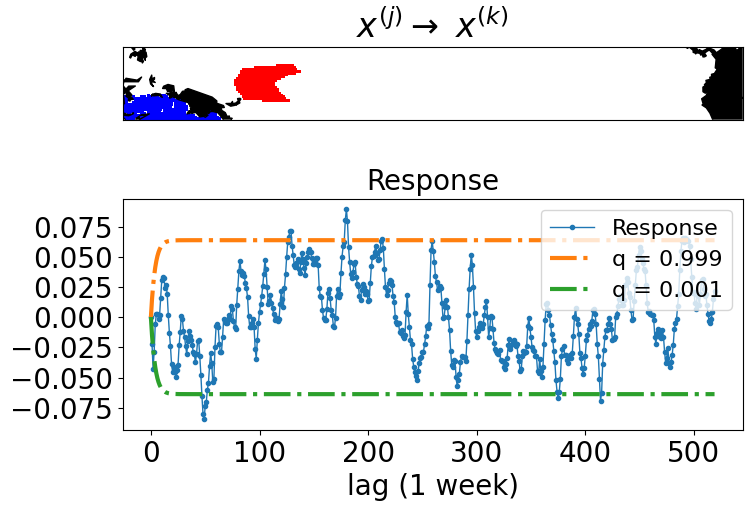

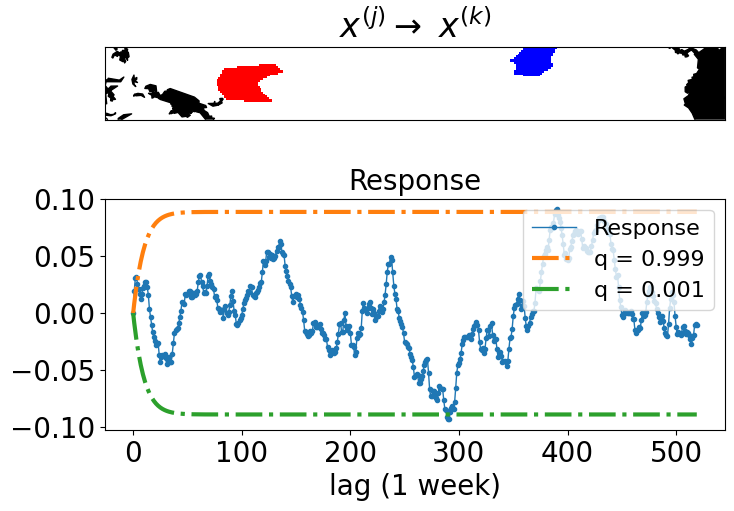

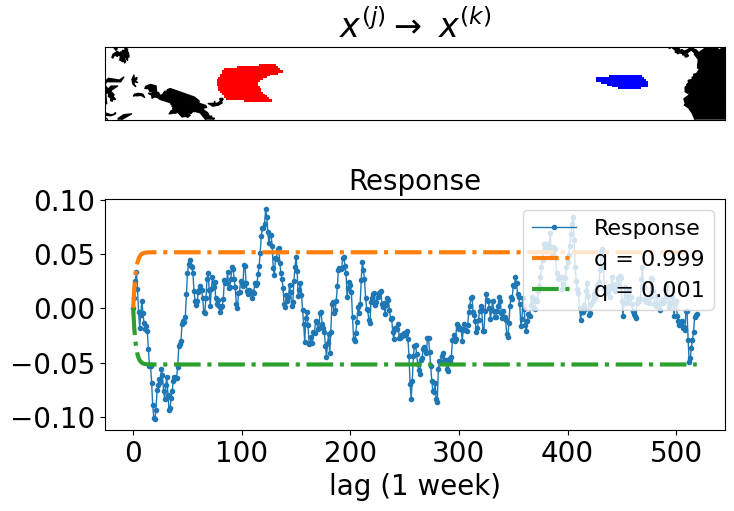

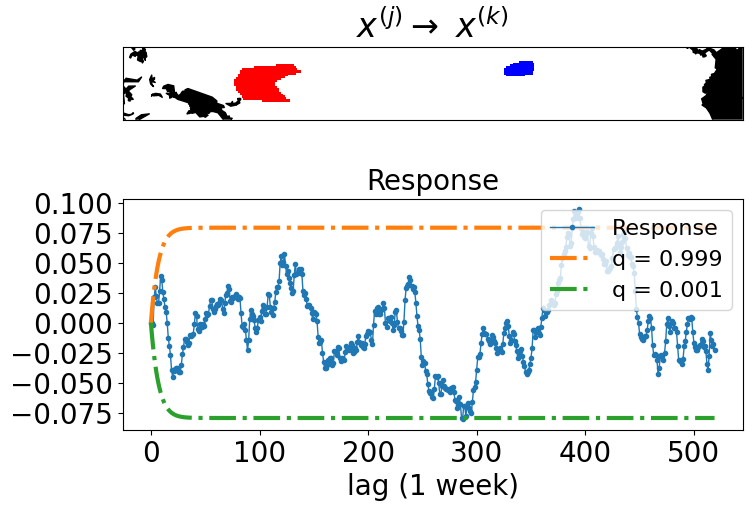

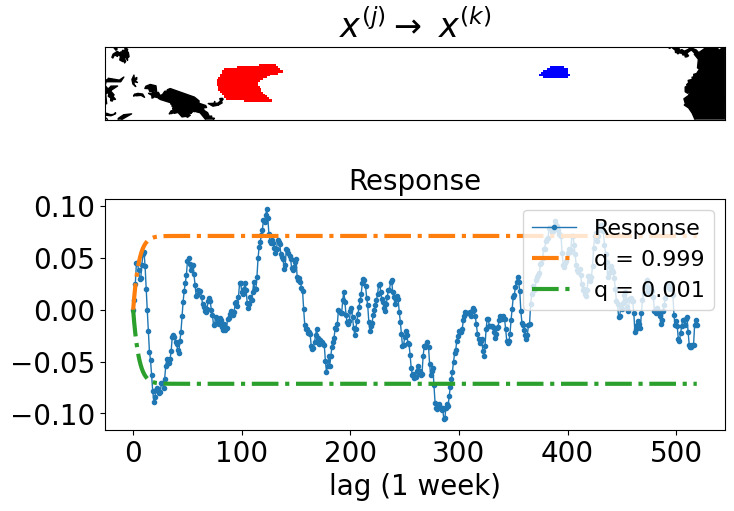

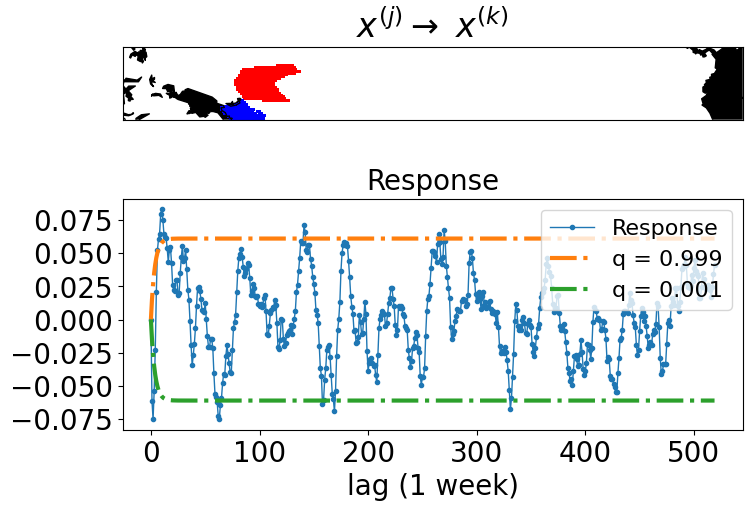

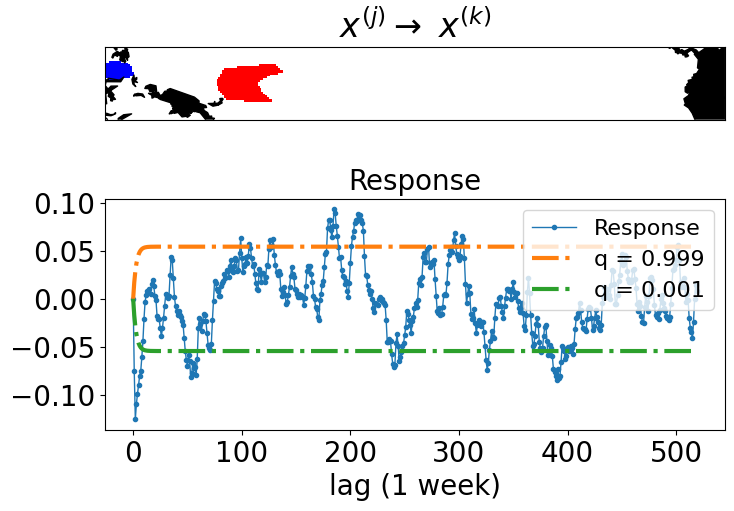

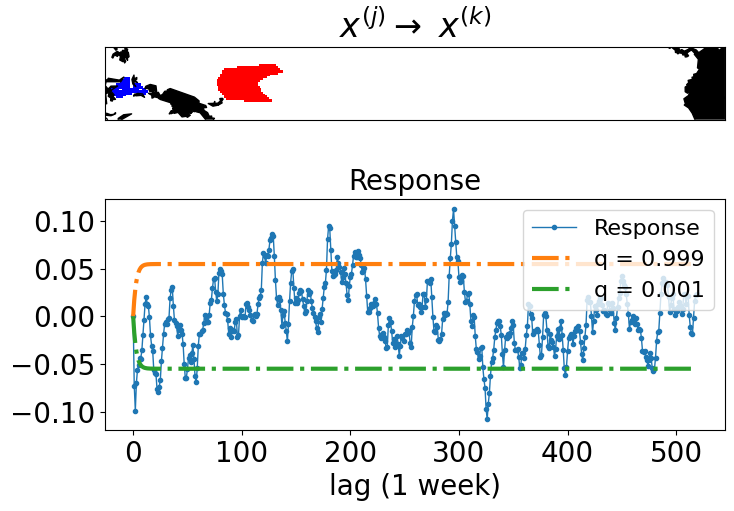

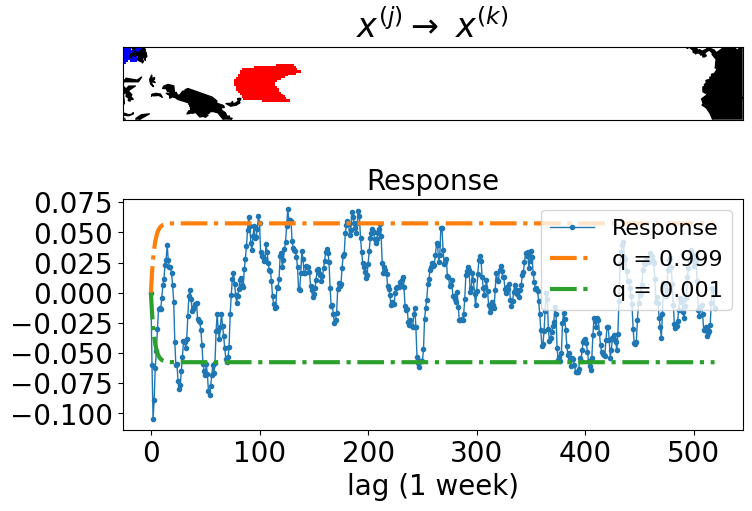

In [59]:
# Let's check the causal link j -> k where 
# k = 12 is the Gulf Of Mexico 
# So we are checking the relationship between every other domain and the GoM

j = 0

# Let's look at all average signals
for k in range(len(single_communities)):
    
    
    fig = plt.figure(figsize=(8,6))

    ax = fig.add_subplot(211)  
    
    map = Basemap(projection='cyl',
            llcrnrlat=-10,urcrnrlat=10,\
                llcrnrlon=120,urcrnrlon=290)
    map.drawcoastlines()
    #map.drawparallels(np.arange(-90.,100.,30.), \
    #  labels=[1,0,0,0],fontsize = 20,linewidth = 0)
    #map.drawmeridians(np.arange(0.,360.,60.), \
    #  labels=[0,0,0,1],fontsize = 20,linewidth = 0)
    map.fillcontinents(color = 'black')

    #cmap=discrete_cmap(50,base_cmap=plt.cm.jet)
    map.pcolor(longitudes,latitudes,single_communities[j],cmap = plt.cm.bwr_r,label='#5')
    map.pcolor(longitudes,latitudes,single_communities[k],cmap=plt.cm.bwr,label='#'+str(k))
    #cb=plt.colorbar(location='bottom',aspect=20,pad=0.08)
    #cb.ax.tick_params(labelsize=37)
    
    # Plot domain id
    plt.title('$x^{(j)}$'+ r'$\rightarrow$ '+'$x^{(k)}$', fontsize = 24)

    
    ax = fig.add_subplot(212)  
    
    plt.plot(response_matrix[:,k,j],'.-',label = 'Response',linewidth = 1,markersize = 6)
    plt.plot(null_response_high_percentile[:,k,j],'-.',linewidth = 3,label='q = 0.999')
    plt.plot(null_response_low_percentile[:,k,j],'-.',linewidth = 3,label='q = 0.001')
    #plt.plot(null_response_99p9_percentile[:,k,j],'-.',label = '$q = 1 - 10^{-5}$',linewidth = 3)
    #plt.plot(null_response_0p1_percentile[:,k,j],'-.',label = '$q = 10^{-5}$',linewidth = 3)
    #plt.plot(null_response_99_percentile[:,k,j],'-.',label = '99th percentile',color = 'tab:red',linewidth = 3)
    #plt.plot(null_response_1_percentile[:,k,j],'-.',label = '1st percentile',color = 'tab:red',linewidth = 3)

    plt.legend(loc = 'upper right',fontsize = 16)

    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    #ax.set_xticks([0,5,10,15,20])
    #ax.set_xticklabels(['0','5','10','15','20'])

    plt.xlabel('lag (1 week)',fontsize = 20)
    plt.title('Response',fontsize = 20)

    
    plt.subplots_adjust(wspace=0.15, hspace=0)
    
    
    plt.show()
    
    #fig.savefig('./figures/Infomap/q0p95/no_heuristics/ElNino_connections/ElNino_Linkages_'+str(k)+'.eps',bbox_inches='tight') # bbox_inches='tight'

## Paper plot

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


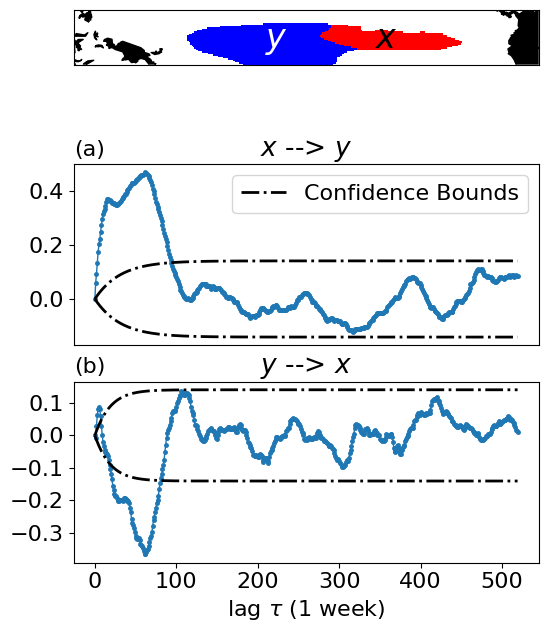

In [60]:
fig = plt.figure(figsize=(6,8))

j = 1
k = 0

ax = plt.subplot(311)

map = Basemap(projection='cyl',
            llcrnrlat=-10,urcrnrlat=10,\
                llcrnrlon=120,urcrnrlon=290)
map.drawcoastlines()
#map.drawparallels(np.arange(-90.,100.,30.), \
#  labels=[1,0,0,0],fontsize = 20,linewidth = 0)
#map.drawmeridians(np.arange(0.,360.,60.), \
#  labels=[0,0,0,1],fontsize = 20,linewidth = 0)
map.fillcontinents(color = 'black')

#cmap=discrete_cmap(50,base_cmap=plt.cm.jet)
map.pcolor(longitudes,latitudes,single_communities[j],cmap = plt.cm.bwr_r,label='#5')
map.pcolor(longitudes,latitudes,single_communities[k],cmap=plt.cm.bwr,label='#'+str(k))

plt.text(230,-4,'$x$',fontsize=24,c = 'k')
plt.text(190,-4,'$y$',fontsize=24,c = 'w')

ax = plt.subplot(312)

j = 1
k = 0

plt.plot(response_matrix[:,k,j],'.-',color = 'tab:blue',linewidth = 1,markersize = 5)
# Analytical
plt.plot(null_response_high_percentile[:,k,j],'-.', color = 'k',linewidth = 2,markersize = 20)#
plt.plot(null_response_low_percentile[:,k,j],'-.',label = 'Confidence Bounds',color = 'k',linewidth = 2,markersize = 20)

plt.legend(fontsize = 16)
plt.xticks([])
plt.yticks(fontsize = 16)
#ax.set_xticks([0,5,10,15,20])
#ax.set_xticklabels(['0','5','10','15','20'])

#plt.ylim([-0.02,0.045])

#plt.xlabel('lag ' + r'$\tau$',fontsize = 20)
        
plt.title('$x$' + ' --> ' + '$y$', fontsize=19)
plt.title('(a)', loc = 'left', fontsize=16)

j = 0
k = 1

ax = plt.subplot(313)
plt.plot(response_matrix[:,k,j],'.-',color = 'tab:blue',linewidth = 1,markersize = 5)

# Analytical
plt.plot(null_response_high_percentile[:,k,j],'-.', color = 'k',linewidth = 2,markersize = 20)#
plt.plot(null_response_low_percentile[:,k,j],'-.',label = 'Confidence Bounds',color = 'k',linewidth = 2,markersize = 20)

#plt.legend(fontsize = 18)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

#plt.ylim([-0.015,0.05])

plt.xlabel('lag ' + r'$\tau$' + ' (1 week)',fontsize = 16)
        
plt.title('$y$' + ' --> ' + '$x$', fontsize=19)
plt.title('(b)', loc = 'left', fontsize=16)

fig.savefig('./figures/East_to_West_to_East.eps',bbox_inches='tight') 